In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.svm import SVC, LinearSVC

In [2]:
forest_train_data = pd.read_csv(r'D:\datascience__\end to end data sets-20230507T155014Z-001\end to end data sets\ForestTypes\training.csv')
forest_test_data = pd.read_csv(r'D:\datascience__\end to end data sets-20230507T155014Z-001\end to end data sets\ForestTypes\testing.csv')

This data set contains training and testing data from a remote sensing study which mapped different forest types based on their spectral characteristics at visible-to-near infrared wavelengths, using ASTER satellite imagery. The output (forest type map) can be used to identify and/or quantify the ecosystem services (e.g. carbon storage, erosion protection) provided by the forest.

In [3]:
forest_train_data.shape, forest_test_data.shape

((198, 28), (325, 28))

In [4]:
pd.set_option('display.max_columns', 30)
forest_train_data.head().T

,0,1,2,3,4
class,d,h,s,s,d
b1,39,84,53,59,57
b2,36,30,25,26,49
b3,57,57,49,49,66
b4,91,112,99,103,103
b5,59,51,51,47,64
b6,101,98,93,92,106
b7,93,92,84,82,114
b8,27,26,26,25,28
b9,60,62,58,56,59


Data Description:

Class: 's' ('Sugi' forest), 'h' ('Hinoki' forest), 'd' ('Mixed deciduous' forest), 'o' ('Other' non-forest land)

b1 - b9: ASTER image bands containing spectral information in the green, red, and near infrared wavelengths for three dates (Sept. 26, 2010; March 19, 2011; May 08, 2011.

pred_minus_obs_S_b1 - pred_minus_obs_S_b9: Predicted spectral values (based on spatial interpolation) minus actual spectral values for the 's' class (b1-b9).

pred_minus_obs_H_b1 - pred_minus_obs_H_b9: Predicted spectral values (based on spatial interpolation) minus actual spectral values for the 'h' class (b1-b9).

In [5]:
forest_train_data['class'].replace({'s':"Sugi", 'h':"Hinoki", 'd':"Mixed_deciduous", 'o':"Non_forest"},inplace=True, regex=True)
forest_test_data['class'].replace({'s':"Sugi", 'h':"Hinoki", 'd':"Mixed_deciduous", 'o':"Non_forest"},inplace=True, regex=True)

In [6]:
forest_train_data.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,pred_minus_obs_H_b1,pred_minus_obs_H_b2,pred_minus_obs_H_b3,pred_minus_obs_H_b4,pred_minus_obs_H_b5,pred_minus_obs_H_b6,pred_minus_obs_H_b7,pred_minus_obs_H_b8,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,Mixed_deciduous,39,36,57,91,59,101,93,27,60,75.70,14.86,40.35,7.97,-32.92,-38.92,-14.94,4.47,-2.36,-18.41,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-5.20,-7.86
1,Hinoki,84,30,57,112,51,98,92,26,62,30.58,20.42,39.83,-16.74,-24.92,-36.33,-15.67,8.16,-2.26,-16.27,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-8.87,-10.83
2,Sugi,53,25,49,99,51,93,84,26,58,63.20,26.70,49.28,3.25,-24.89,-30.38,-3.60,4.15,-1.46,-15.92,-1.79,-4.64,-17.73,-0.48,-4.69,-19.97,-4.10,-7.07
3,Sugi,59,26,49,103,47,92,82,25,56,55.54,24.50,47.90,-6.20,-20.98,-30.28,-5.03,7.77,2.68,-13.77,-2.53,-6.34,-22.03,-2.34,-6.60,-27.10,-7.99,-10.81
4,Mixed_deciduous,57,49,66,103,64,106,114,28,59,59.44,2.62,32.02,-1.33,-37.99,-43.57,-34.25,1.83,-2.94,-21.74,-1.64,-4.62,-23.74,-0.85,-5.50,-22.83,-2.74,-5.84


In [7]:
forest_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   class                198 non-null    object 
 1   b1                   198 non-null    int64  
 2   b2                   198 non-null    int64  
 3   b3                   198 non-null    int64  
 4   b4                   198 non-null    int64  
 5   b5                   198 non-null    int64  
 6   b6                   198 non-null    int64  
 7   b7                   198 non-null    int64  
 8   b8                   198 non-null    int64  
 9   b9                   198 non-null    int64  
 10  pred_minus_obs_H_b1  198 non-null    float64
 11  pred_minus_obs_H_b2  198 non-null    float64
 12  pred_minus_obs_H_b3  198 non-null    float64
 13  pred_minus_obs_H_b4  198 non-null    float64
 14  pred_minus_obs_H_b5  198 non-null    float64
 15  pred_minus_obs_H_b6  198 non-null    flo

In [8]:
forest_train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
b1,198.0,62.949495,12.779563,34.00,54.0000,60.000,70.7500,105.00
b2,198.0,41.020202,17.832543,25.00,28.0000,31.500,50.7500,160.00
b3,198.0,63.676768,17.314545,47.00,52.0000,57.000,69.0000,196.00
b4,198.0,101.409091,14.804627,54.00,92.2500,99.500,111.7500,172.00
b5,198.0,58.732323,12.392648,44.00,49.0000,55.000,65.0000,98.00
b6,198.0,100.651515,11.190314,84.00,92.0000,98.000,107.0000,136.00
b7,198.0,90.601010,15.588861,54.00,80.0000,91.000,101.0000,139.00
b8,198.0,28.691919,8.977752,21.00,24.0000,25.000,27.0000,82.00
b9,198.0,61.116162,9.787158,50.00,55.0000,58.000,63.0000,109.00
pred_minus_obs_H_b1,198.0,50.818889,12.842321,7.66,40.6675,53.030,59.9200,83.32


In [9]:
target = []
for cols in forest_train_data.select_dtypes("object"):
    target.append(cols)
    
num_cols = []
for cols in forest_train_data.select_dtypes(["int64", "float64"]):
    num_cols.append(cols)

In [10]:
forest_train_data[target] = forest_train_data[target].astype("category")

In [11]:
#target class 
for col in target:
    print(forest_train_data[col].value_counts())

Sugi                59
Mixed_deciduous     54
Hinoki              48
Non_forest          37
Name: class, dtype: int64


In [12]:
#target class 
for col in target:
    print(forest_test_data[col].value_counts())

Sugi                136
Mixed_deciduous     105
Non_forest           46
Hinoki               38
Name: class, dtype: int64


In [13]:
#joining both train and test data
forest_data = pd.concat([forest_train_data, forest_test_data], ignore_index=True)

In [14]:
forest_data.shape

(523, 28)

In [15]:
forest_data['class'].value_counts()

Sugi                195
Mixed_deciduous     159
Hinoki               86
Non_forest           83
Name: class, dtype: int64

Text(0.5, 1.0, 'Forest Type Disribution')

<Figure size 1440x576 with 0 Axes>

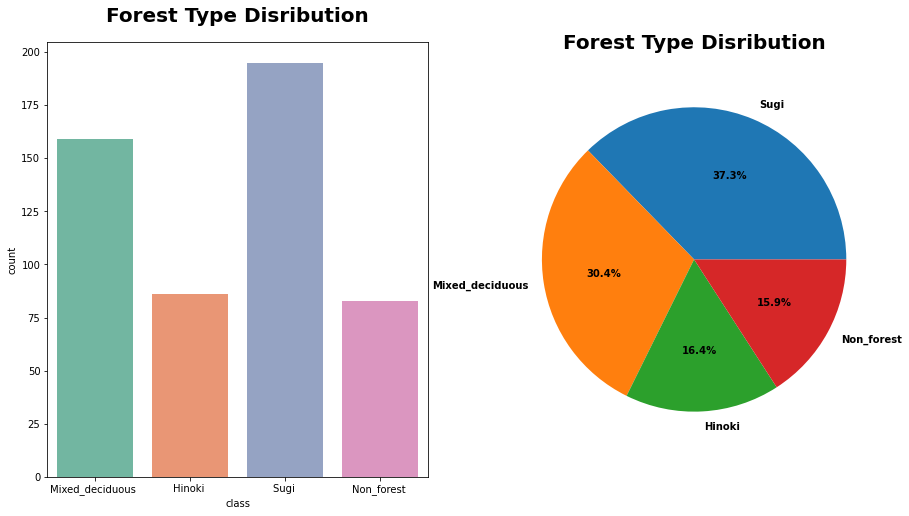

In [16]:
#Univariate Analysis of Target Variable
count = forest_data['class'].value_counts()
labels = 'Sugi', 'Mixed_deciduous', 'Hinoki', 'Non_forest'

plt.figure(figsize=(20,8))
fig,ax = plt.subplots(figsize=(15,8))

plt.subplot(1,2,1)
sns.countplot(x ='class', data=forest_data, palette="Set2")
plt.title("Forest Type Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=labels, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"})
plt.title("Forest Type Disribution",fontweight="black",size=20,pad=20)

Data shows the different forest and non-forest areas of Japan.

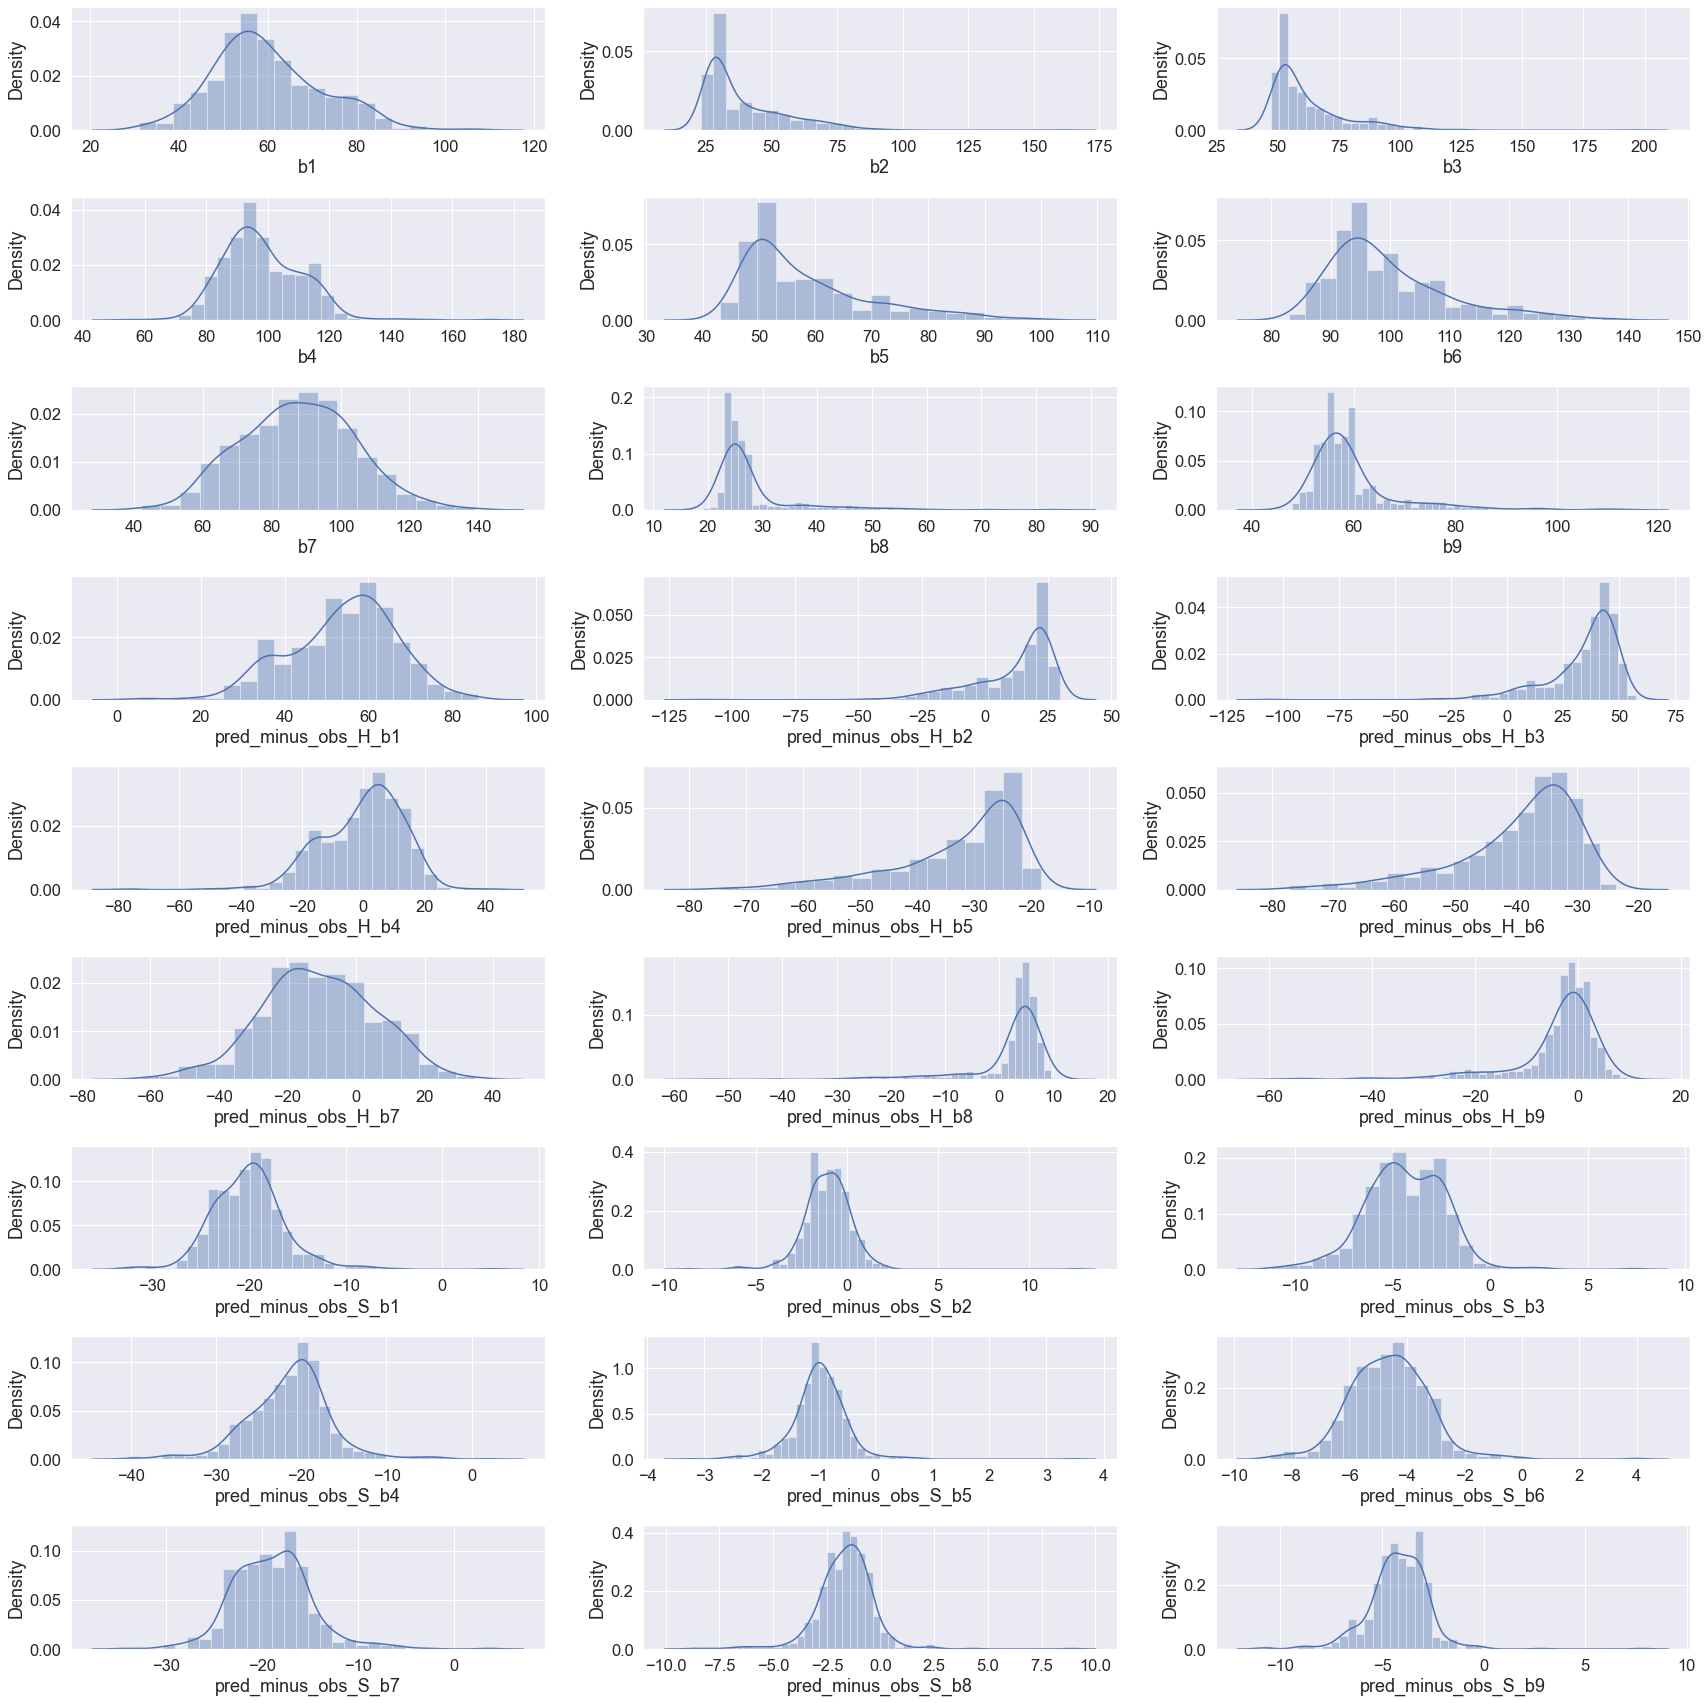

In [17]:
#Univariate Analysis of Numerical Features
sns.set(rc={'figure.figsize':(24,24)},font_scale=1.5)
i=1
for column in forest_data[num_cols]:
    plt.subplot(9,3,i)
    sns.distplot(forest_data[column])
    i=i+1
plt.tight_layout()
plt.show()

Most of the data points have normal distribution and some are skewed.

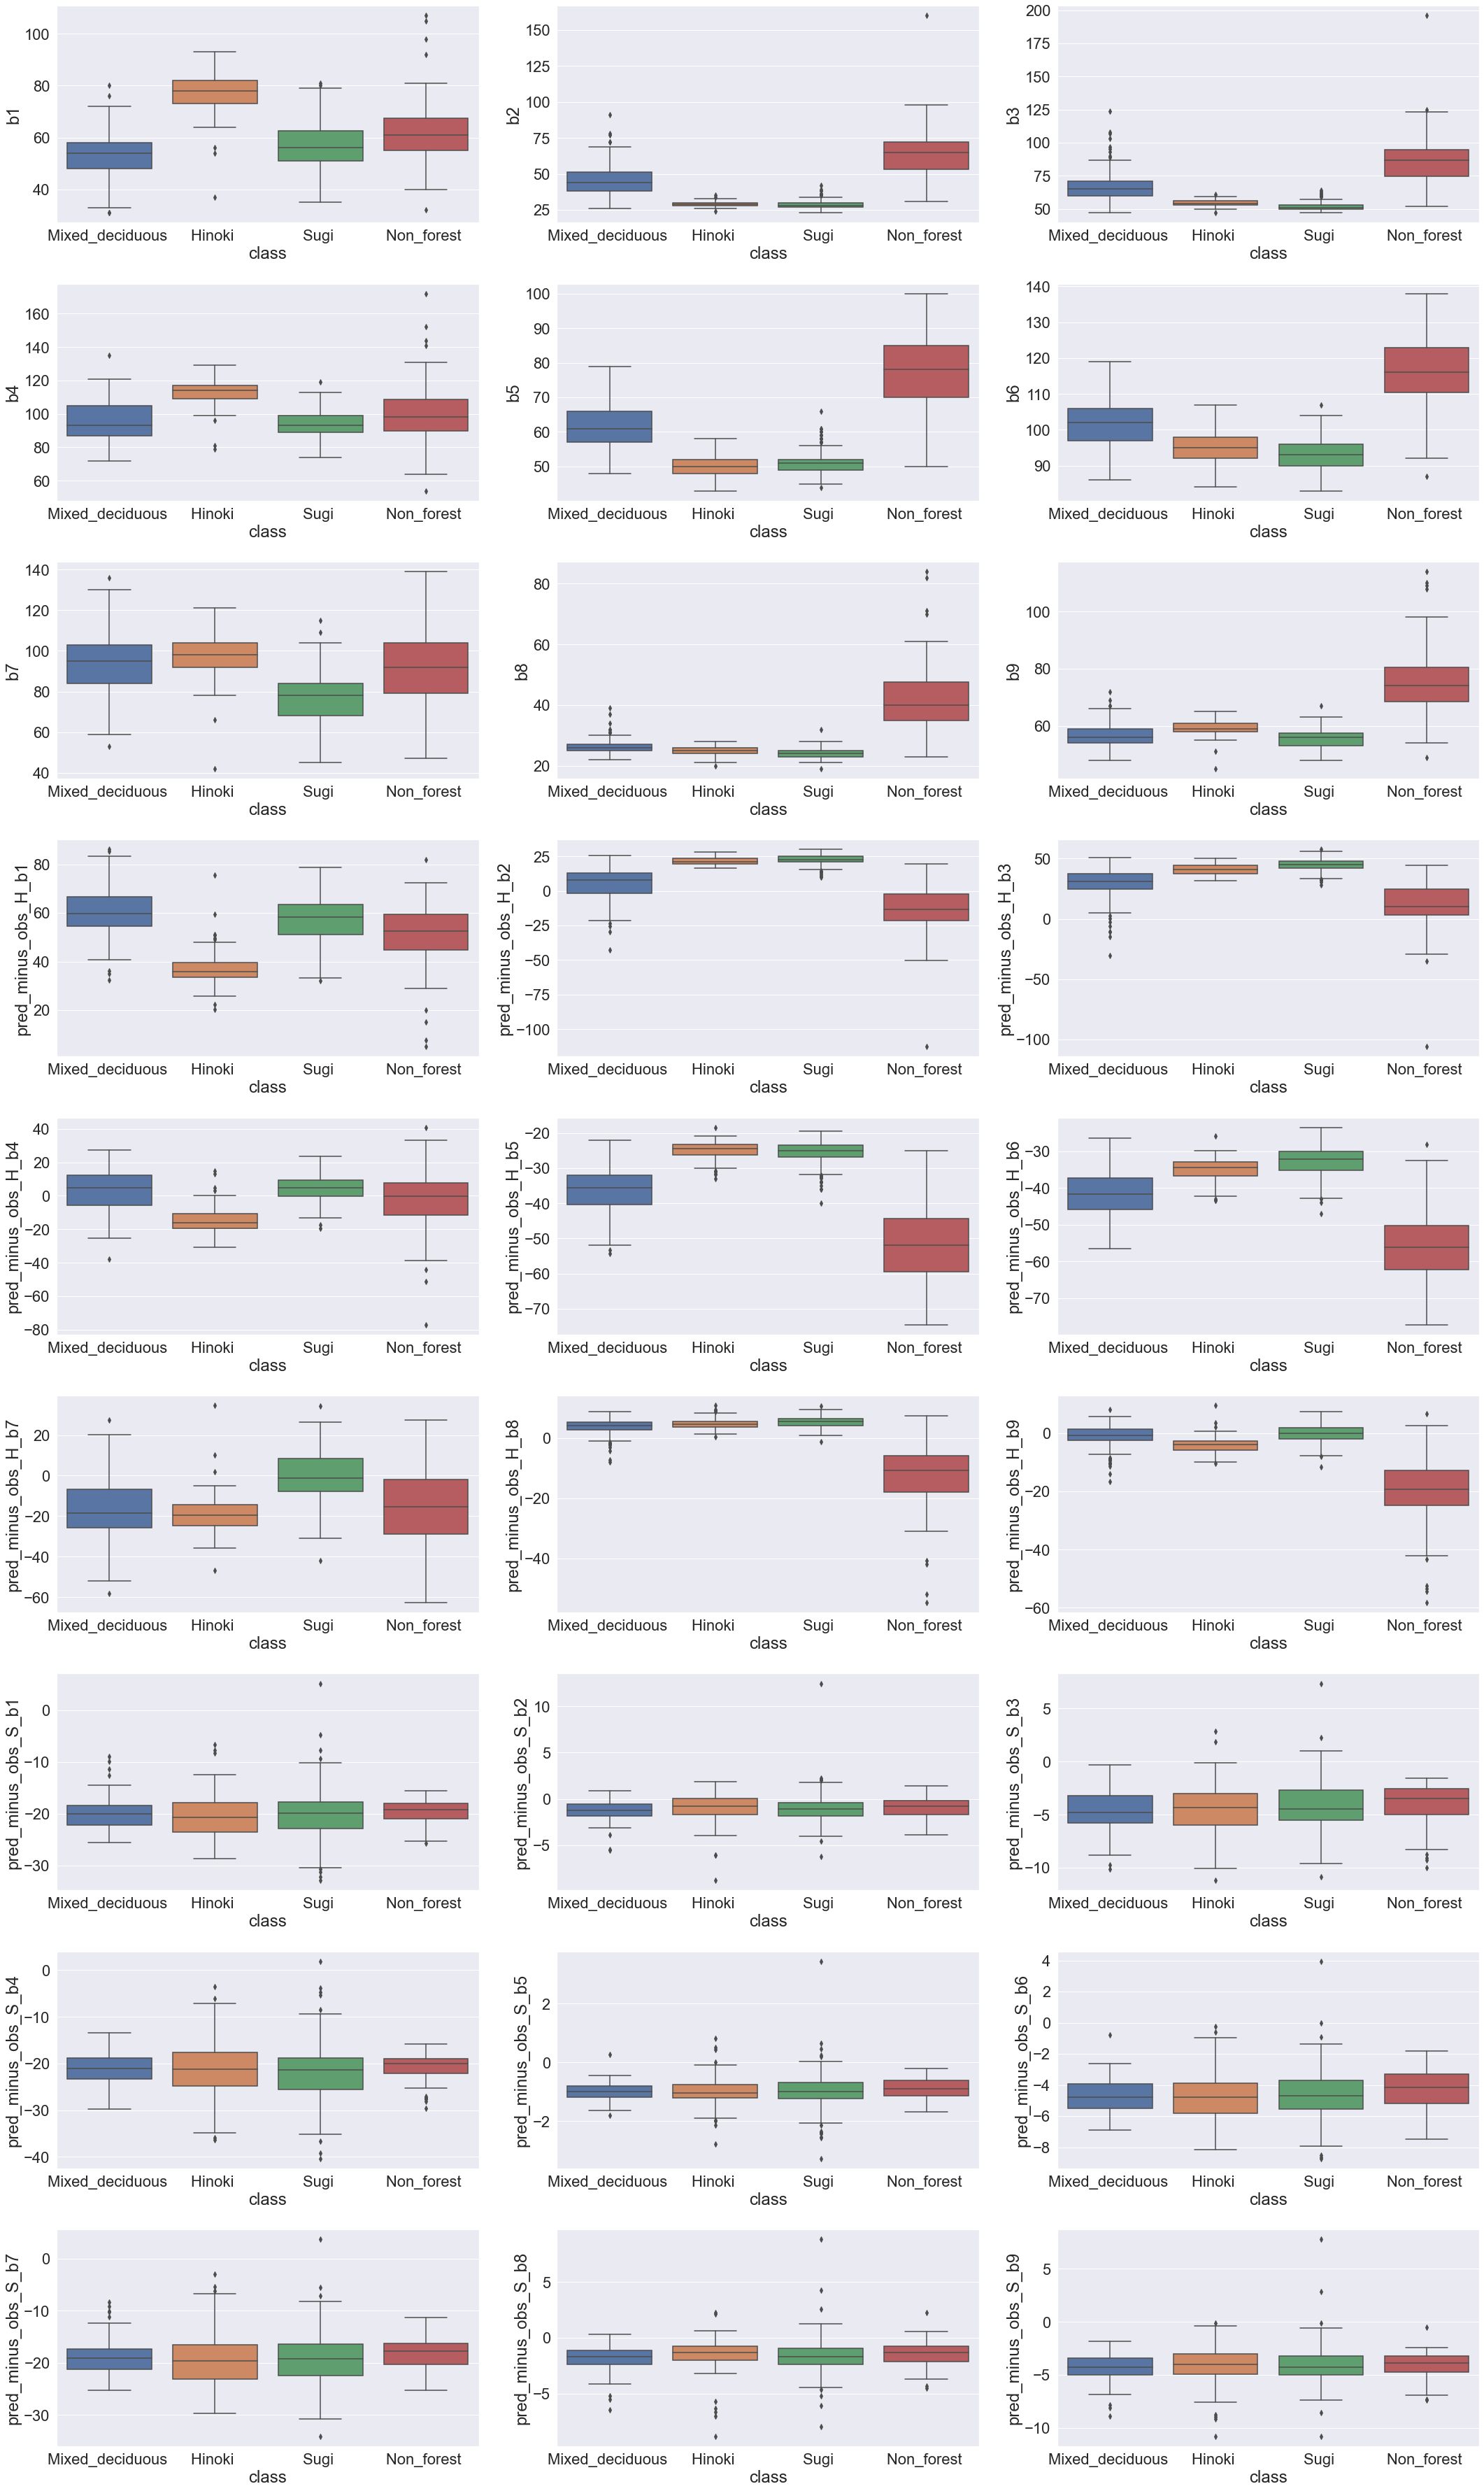

In [18]:
#outlier analysis
sns.set(font_scale=2)
fig = plt.figure(figsize=(30,50))
i=1
for column in forest_data[num_cols]:
    plt.subplot(9,3,i)
    sns.boxplot(x=forest_data['class'], y=forest_data.loc[:,column])
    i=i+1

plt.tight_layout()
plt.show()

Few outliers are present in all forest types and those are naturally possible.

In [19]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
#checking multicollinearity
Y = forest_data[target]
X = forest_data[num_cols]
X = sm.add_constant(X)

In [21]:
#calculating vif factor
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['features'] = X.columns

In [22]:
#inspecting vif factors
vif.round(1)

,VIF Factor,features
0,17547.6,const
1,242.6,b1
2,1865.4,b2
3,1064.7,b3
4,89.0,b4
5,16428.6,b5
6,3605.7,b6
7,463.7,b7
8,2890.3,b8
9,3536.5,b9


High collineraity is observed for most of the featues, let's drop the feature with maximum VIF Factor first and then proceed the same until we are left with VIF<5.

In [23]:
X.drop(['b5'], axis =1, inplace = True)
num_cols.remove('b5')

In [24]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.round(1)

,VIF Factor,features
0,16110.9,const
1,242.3,b1
2,1622.9,b2
3,826.0,b3
4,86.6,b4
5,324.5,b6
6,455.4,b7
7,2420.0,b8
8,3211.2,b9
9,246.9,pred_minus_obs_H_b1


In [25]:
X.drop(['pred_minus_obs_H_b9'], axis =1, inplace = True)
num_cols.remove('pred_minus_obs_H_b9')

In [26]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.round(1)

,VIF Factor,features
0,6689.9,const
1,242.2,b1
2,1566.8,b2
3,811.1,b3
4,83.2,b4
5,239.0,b6
6,418.6,b7
7,341.7,b8
8,24.2,b9
9,246.9,pred_minus_obs_H_b1


In [27]:
X.drop(['b2'], axis =1, inplace = True)
num_cols.remove('b2')
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.round(1)

,VIF Factor,features
0,6418.8,const
1,232.6,b1
2,169.8,b3
3,76.3,b4
4,203.7,b6
5,417.8,b7
6,231.6,b8
7,24.2,b9
8,237.4,pred_minus_obs_H_b1
9,40.5,pred_minus_obs_H_b2


In [28]:
X.drop(['b7'], axis =1, inplace = True)
num_cols.remove('b7')
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.round(1)

,VIF Factor,features
0,6115.6,const
1,94.6,b1
2,136.1,b3
3,58.7,b4
4,203.7,b6
5,227.4,b8
6,24.1,b9
7,99.0,pred_minus_obs_H_b1
8,40.4,pred_minus_obs_H_b2
9,161.8,pred_minus_obs_H_b3


In [29]:
X.drop(['b8'], axis =1, inplace = True)
num_cols.remove('b8')
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.round(1)

,VIF Factor,features
0,4177.6,const
1,82.6,b1
2,136.0,b3
3,45.8,b4
4,202.2,b6
5,22.6,b9
6,87.4,pred_minus_obs_H_b1
7,40.2,pred_minus_obs_H_b2
8,161.7,pred_minus_obs_H_b3
9,41.8,pred_minus_obs_H_b4


In [30]:
X.drop(['b6'], axis =1, inplace = True)
num_cols.remove('b6')
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.round(1)

,VIF Factor,features
0,3275.0,const
1,81.9,b1
2,88.4,b3
3,45.7,b4
4,21.1,b9
5,86.1,pred_minus_obs_H_b1
6,39.4,pred_minus_obs_H_b2
7,101.3,pred_minus_obs_H_b3
8,41.6,pred_minus_obs_H_b4
9,22.8,pred_minus_obs_H_b5


In [31]:
X.drop(['pred_minus_obs_H_b3'], axis =1, inplace = True)
num_cols.remove('pred_minus_obs_H_b3')
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.round(1)

,VIF Factor,features
0,3137.6,const
1,59.8,b1
2,28.6,b3
3,43.3,b4
4,21.1,b9
5,58.5,pred_minus_obs_H_b1
6,32.8,pred_minus_obs_H_b2
7,39.2,pred_minus_obs_H_b4
8,22.8,pred_minus_obs_H_b5
9,23.5,pred_minus_obs_H_b6


In [32]:
X.drop(['b1'], axis =1, inplace = True)
num_cols.remove('b1')
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.round(1)

,VIF Factor,features
0,2257.7,const
1,28.5,b3
2,28.2,b4
3,20.9,b9
4,3.5,pred_minus_obs_H_b1
5,32.3,pred_minus_obs_H_b2
6,29.6,pred_minus_obs_H_b4
7,22.2,pred_minus_obs_H_b5
8,23.4,pred_minus_obs_H_b6
9,2.9,pred_minus_obs_H_b7


In [33]:
X.drop(['pred_minus_obs_H_b2'], axis =1, inplace = True)
num_cols.remove('pred_minus_obs_H_b2')
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.round(1)

,VIF Factor,features
0,2127.1,const
1,3.3,b3
2,26.9,b4
3,20.1,b9
4,3.4,pred_minus_obs_H_b1
5,28.0,pred_minus_obs_H_b4
6,21.0,pred_minus_obs_H_b5
7,22.9,pred_minus_obs_H_b6
8,2.4,pred_minus_obs_H_b7
9,19.3,pred_minus_obs_H_b8


In [34]:
X.drop(['pred_minus_obs_H_b4'], axis =1, inplace = True)
num_cols.remove('pred_minus_obs_H_b4')
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.round(1)

,VIF Factor,features
0,1417.7,const
1,3.3,b3
2,4.3,b4
3,19.5,b9
4,3.3,pred_minus_obs_H_b1
5,20.2,pred_minus_obs_H_b5
6,22.1,pred_minus_obs_H_b6
7,2.4,pred_minus_obs_H_b7
8,18.5,pred_minus_obs_H_b8
9,5.6,pred_minus_obs_S_b1


In [35]:
X.drop(['pred_minus_obs_H_b6'], axis =1, inplace = True)
num_cols.remove('pred_minus_obs_H_b6')
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.round(1)

,VIF Factor,features
0,1172.3,const
1,3.3,b3
2,2.1,b4
3,17.6,b9
4,2.7,pred_minus_obs_H_b1
5,4.9,pred_minus_obs_H_b5
6,2.3,pred_minus_obs_H_b7
7,18.0,pred_minus_obs_H_b8
8,5.6,pred_minus_obs_S_b1
9,4.2,pred_minus_obs_S_b2


In [36]:
X.drop(['pred_minus_obs_S_b9'], axis =1, inplace = True)
num_cols.remove('pred_minus_obs_S_b9')
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.round(1)

,VIF Factor,features
0,1172.0,const
1,3.3,b3
2,2.1,b4
3,17.5,b9
4,2.7,pred_minus_obs_H_b1
5,4.9,pred_minus_obs_H_b5
6,2.3,pred_minus_obs_H_b7
7,18.0,pred_minus_obs_H_b8
8,5.5,pred_minus_obs_S_b1
9,4.0,pred_minus_obs_S_b2


In [37]:
X.drop(['pred_minus_obs_H_b8'], axis =1, inplace = True)
num_cols.remove('pred_minus_obs_H_b8')
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.round(1)

,VIF Factor,features
0,315.5,const
1,3.2,b3
2,2.1,b4
3,2.6,b9
4,2.5,pred_minus_obs_H_b1
5,4.7,pred_minus_obs_H_b5
6,1.8,pred_minus_obs_H_b7
7,5.5,pred_minus_obs_S_b1
8,4.0,pred_minus_obs_S_b2
9,6.4,pred_minus_obs_S_b3


In [38]:
X.drop(['pred_minus_obs_S_b6'], axis =1, inplace = True)
num_cols.remove('pred_minus_obs_S_b6')
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.round(1)

,VIF Factor,features
0,312.3,const
1,3.2,b3
2,2.0,b4
3,2.5,b9
4,2.5,pred_minus_obs_H_b1
5,4.7,pred_minus_obs_H_b5
6,1.8,pred_minus_obs_H_b7
7,4.9,pred_minus_obs_S_b1
8,3.8,pred_minus_obs_S_b2
9,4.1,pred_minus_obs_S_b3


In [39]:
X.drop(['pred_minus_obs_S_b7'], axis =1, inplace = True)
num_cols.remove('pred_minus_obs_S_b7')
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.round(1)

,VIF Factor,features
0,312.3,const
1,3.2,b3
2,2.0,b4
3,2.5,b9
4,2.5,pred_minus_obs_H_b1
5,4.6,pred_minus_obs_H_b5
6,1.8,pred_minus_obs_H_b7
7,2.6,pred_minus_obs_S_b1
8,3.6,pred_minus_obs_S_b2
9,4.1,pred_minus_obs_S_b3


Now, we have all the independent features. 

In [40]:
X.head()

,const,b3,b4,b9,pred_minus_obs_H_b1,pred_minus_obs_H_b5,pred_minus_obs_H_b7,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b8
0,1.0,57,91,60,75.70,-32.92,-14.94,-18.41,-1.88,-6.43,-21.03,-1.60,-5.20
1,1.0,57,112,62,30.58,-24.92,-15.67,-16.27,-1.95,-6.25,-18.79,-1.99,-8.87
2,1.0,49,99,58,63.20,-24.89,-3.60,-15.92,-1.79,-4.64,-17.73,-0.48,-4.10
3,1.0,49,103,56,55.54,-20.98,-5.03,-13.77,-2.53,-6.34,-22.03,-2.34,-7.99
4,1.0,66,103,59,59.44,-37.99,-34.25,-21.74,-1.64,-4.62,-23.74,-0.85,-2.74


In [41]:
X.drop('const', axis=1, inplace=True)

In [42]:
X.shape

(523, 12)

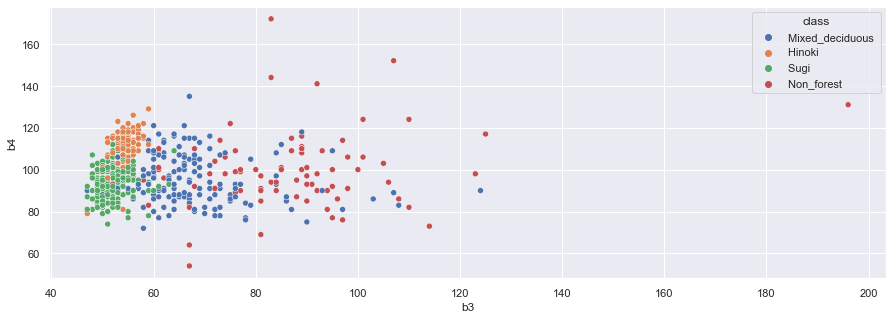

In [43]:
sns.set(rc={'figure.figsize':(24,24)},font_scale=1.0)
plt.figure(figsize=(15,5))
sns.scatterplot(data = forest_data, x='b3', y='b4', hue='class')
plt.show()

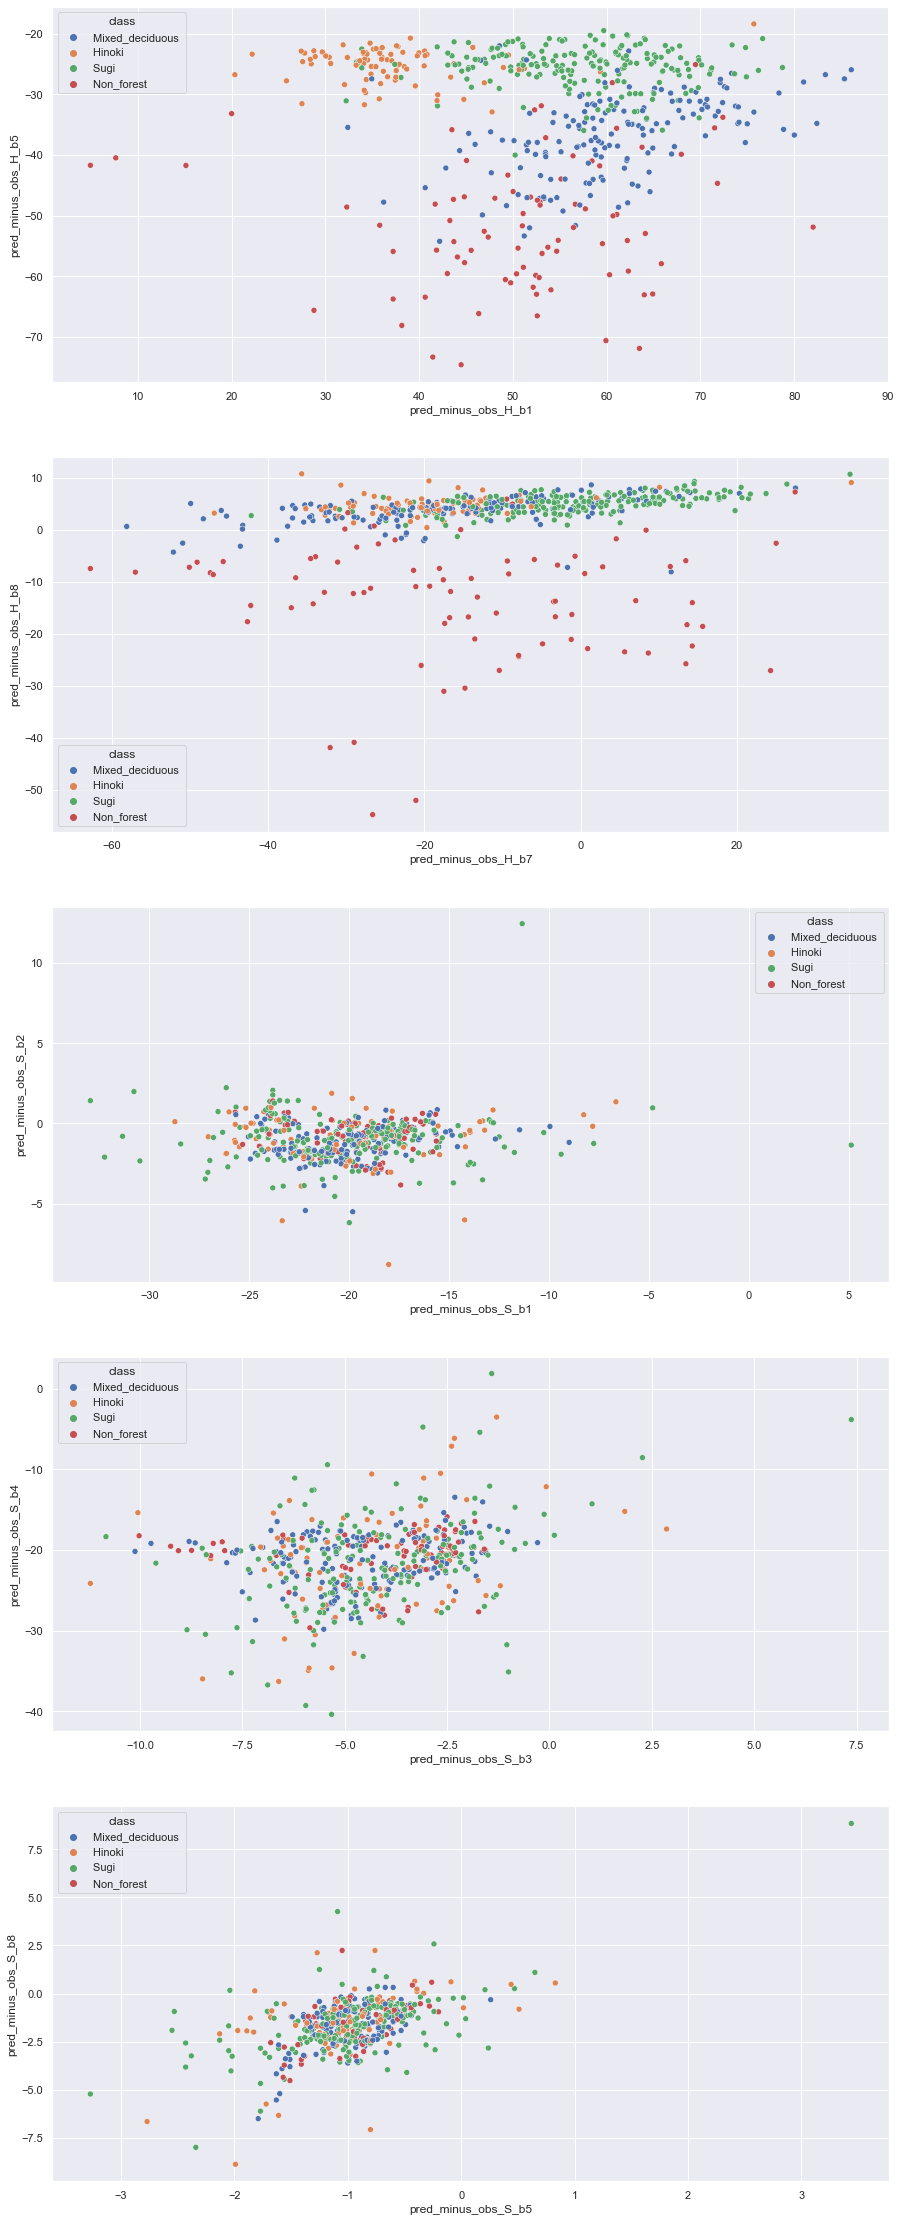

In [44]:
sns.set(rc={'figure.figsize':(24,24)},font_scale=1.0)
plt.figure(figsize=(15,40))
plt.subplot(5,1,1)
sns.scatterplot(data = forest_data, x='pred_minus_obs_H_b1', y='pred_minus_obs_H_b5', hue='class')
plt.subplot(5,1,2)
sns.scatterplot(data = forest_data, x='pred_minus_obs_H_b7', y='pred_minus_obs_H_b8', hue='class')
plt.subplot(5,1,3)
sns.scatterplot(data = forest_data, x='pred_minus_obs_S_b1', y='pred_minus_obs_S_b2', hue='class')
plt.subplot(5,1,4)
sns.scatterplot(data = forest_data, x='pred_minus_obs_S_b3', y='pred_minus_obs_S_b4', hue='class')
plt.subplot(5,1,5)
sns.scatterplot(data = forest_data, x='pred_minus_obs_S_b5', y='pred_minus_obs_S_b8', hue='class')
plt.show()

In [45]:
#Using PCA to reduce dimensionality
from sklearn.decomposition import PCA

pca = PCA()
principal_components = pca.fit_transform(X)
principal_components = pd.DataFrame(principal_components)
print(principal_components.shape)
principal_components.head()

(523, 12)


,0,1,2,3,4,5,6,7,8,9,10,11
0,-10.411015,6.797616,-17.701105,7.616669,-0.478422,2.878088,6.338363,2.177799,-2.550133,1.904128,1.015308,-0.280026
1,10.976786,-22.679062,13.268222,-6.378172,-3.524218,0.264981,-0.767346,4.362071,-4.384715,5.405293,1.601851,-0.265606
2,-16.905889,-5.970683,-1.504836,4.365584,-2.858621,6.658794,4.383247,2.215708,-1.680575,1.531002,0.208800,0.534116
3,-14.012146,-13.159760,2.860281,2.090170,-0.344862,2.916055,3.903447,7.527261,-2.532159,3.642455,1.498053,-0.582393
4,15.996101,-4.039478,-17.580253,5.990925,4.682395,-1.928815,0.433769,-0.269456,-0.092224,0.785396,-0.316818,0.222256


In [46]:
print("The eigen values for the covariance matrix is: ", list(np.round(pca.explained_variance_,decimals=5)),end='\n\n')

The eigen values for the covariance matrix is:  [518.97318, 302.78985, 117.70515, 68.94139, 46.78892, 28.34037, 17.694, 6.39883, 5.42397, 0.80564, 0.40268, 0.09941]



In [47]:
pca.explained_variance_ratio_*100

array([4.65712701e+01, 2.71715536e+01, 1.05625463e+01, 6.18661628e+00,
       4.19871303e+00, 2.54318949e+00, 1.58781235e+00, 5.74214175e-01,
       4.86732770e-01, 7.22956313e-02, 3.61350713e-02, 8.92117600e-03])

After PCA Analysis, we still have 12 independent features, let's proceed to model training.

In [48]:
#Normalising Numerical features
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
X_scaled = pd.DataFrame(minmax.fit_transform(X[num_cols]), columns=num_cols)

In [49]:
X.shape, X_scaled.shape

((523, 12), (523, 12))

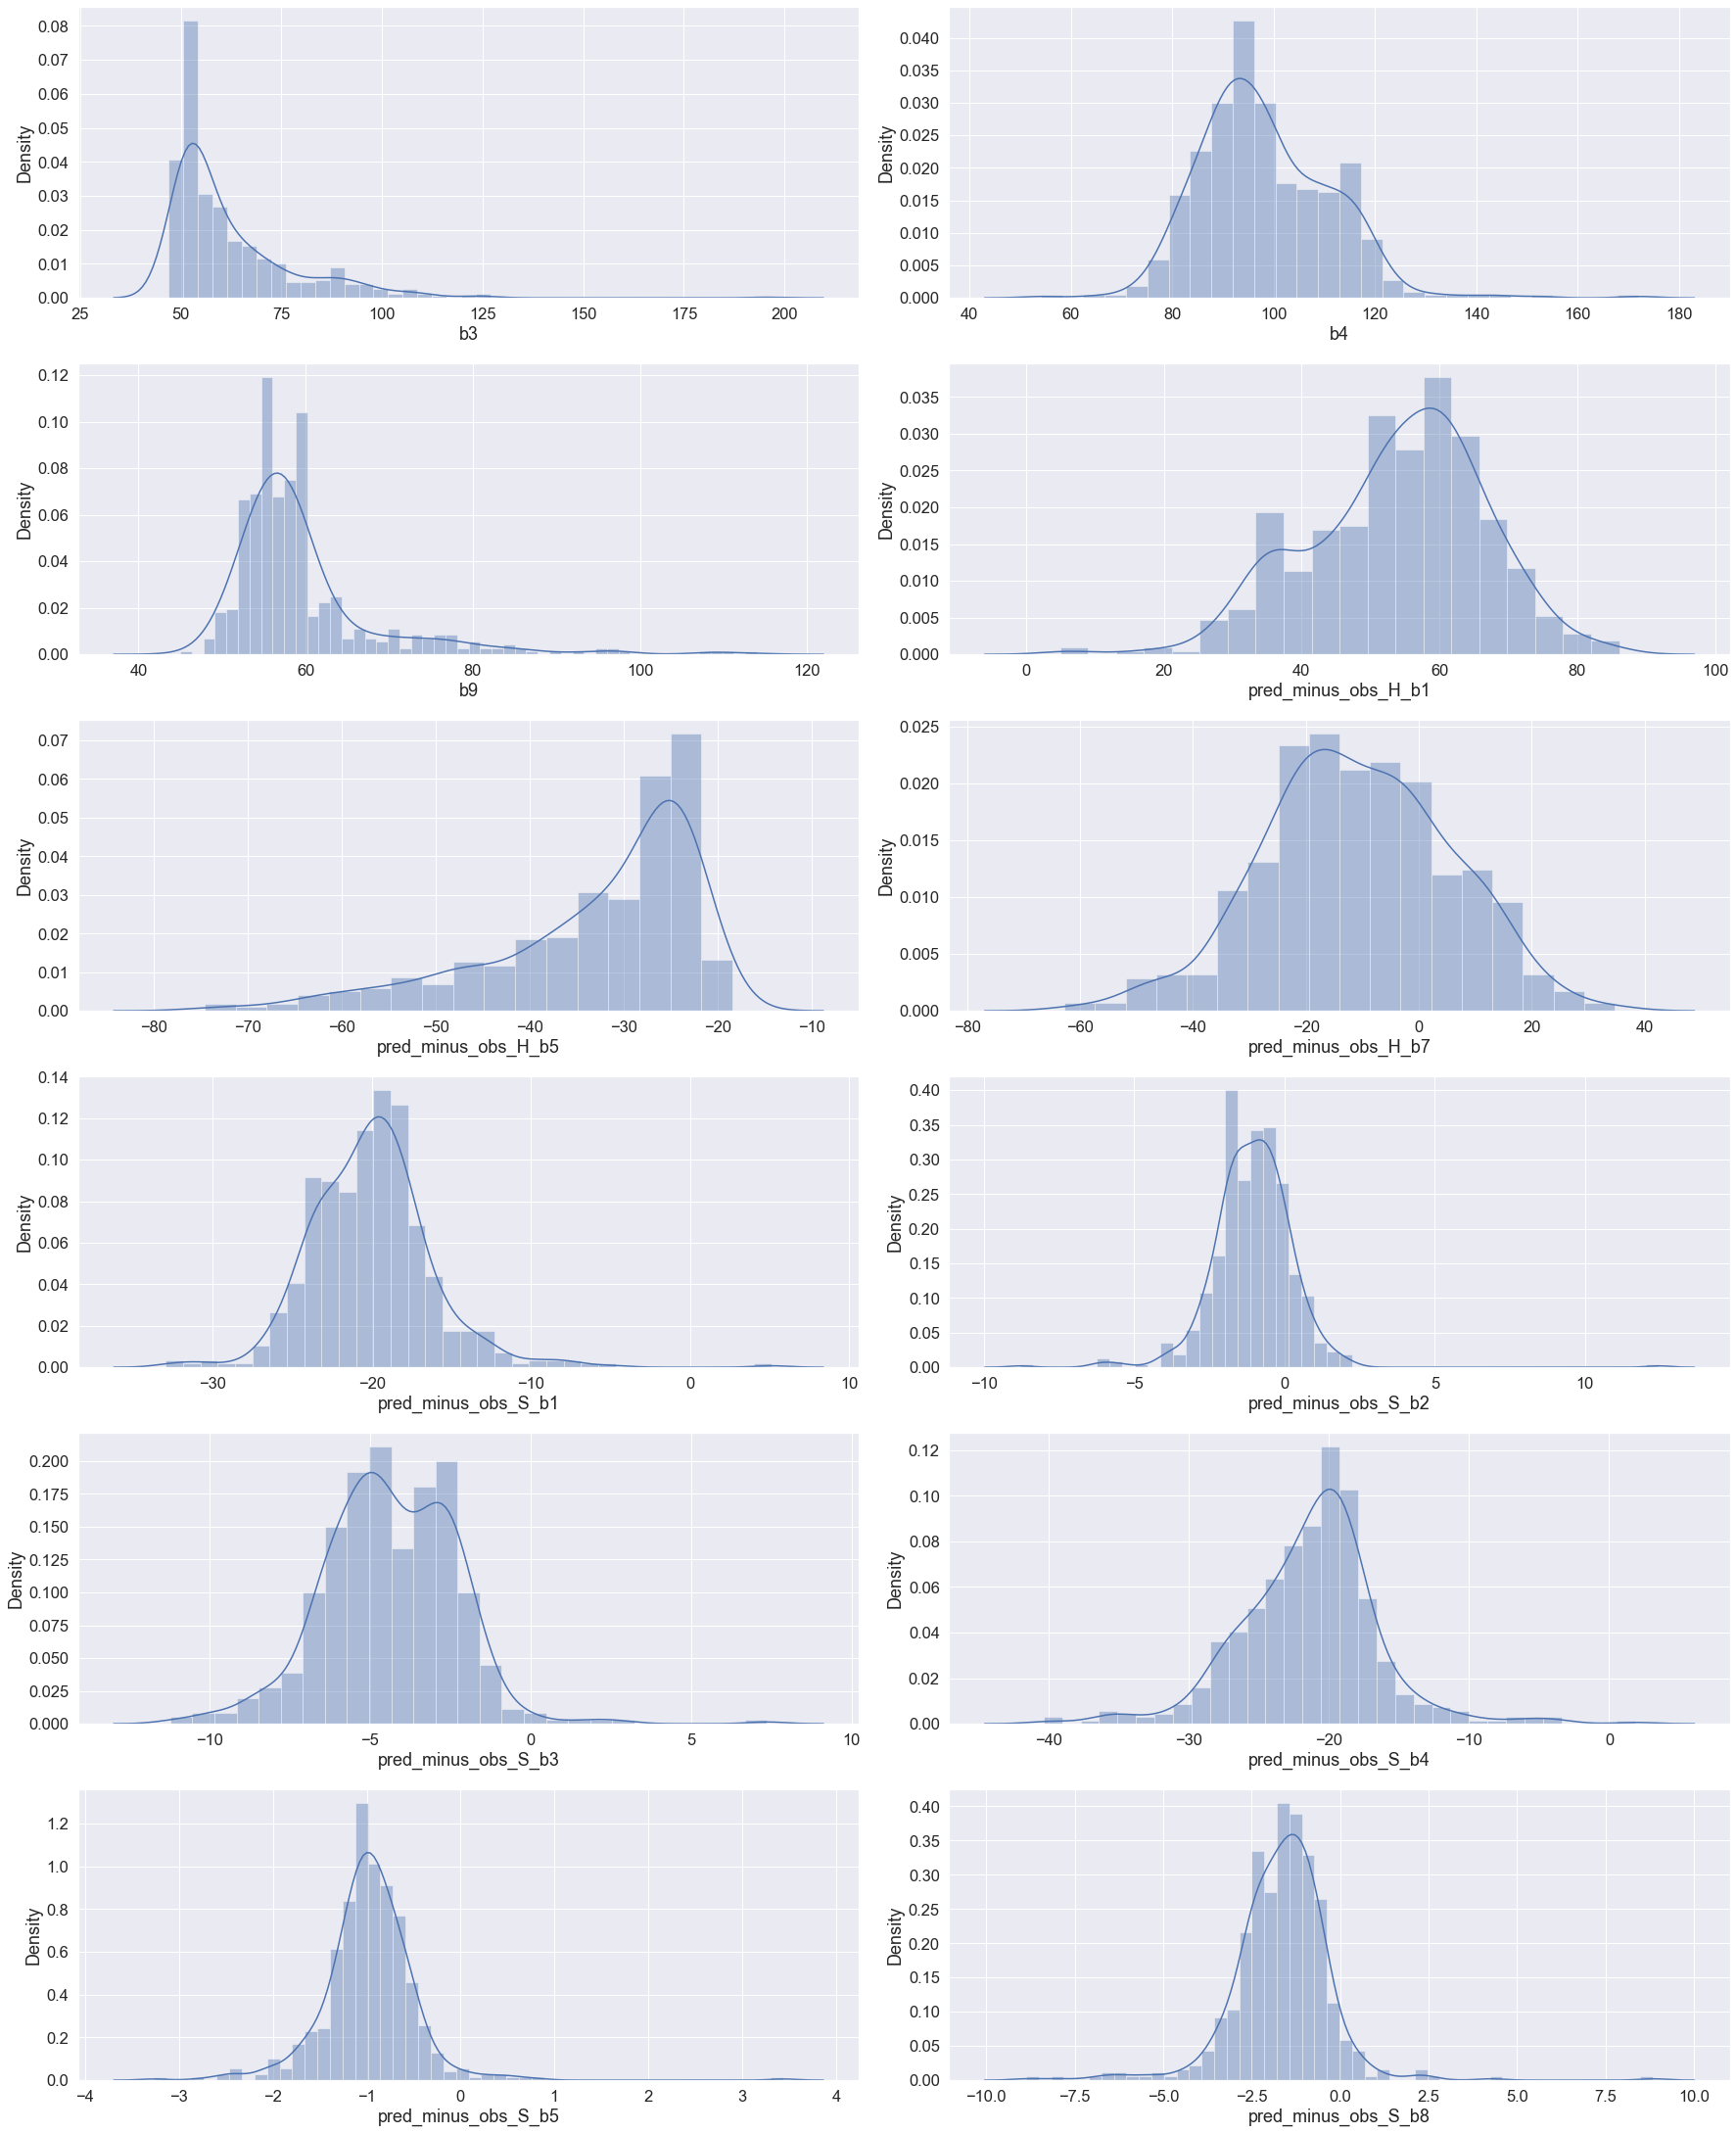

In [50]:
#plotting distribution before scaled
sns.set(rc={'figure.figsize':(25,35)},font_scale=1.5)
i=1
for column in num_cols:
    plt.subplot(7,2,i)
    sns.distplot(X[column])
    i=i+1
plt.tight_layout()
plt.show()

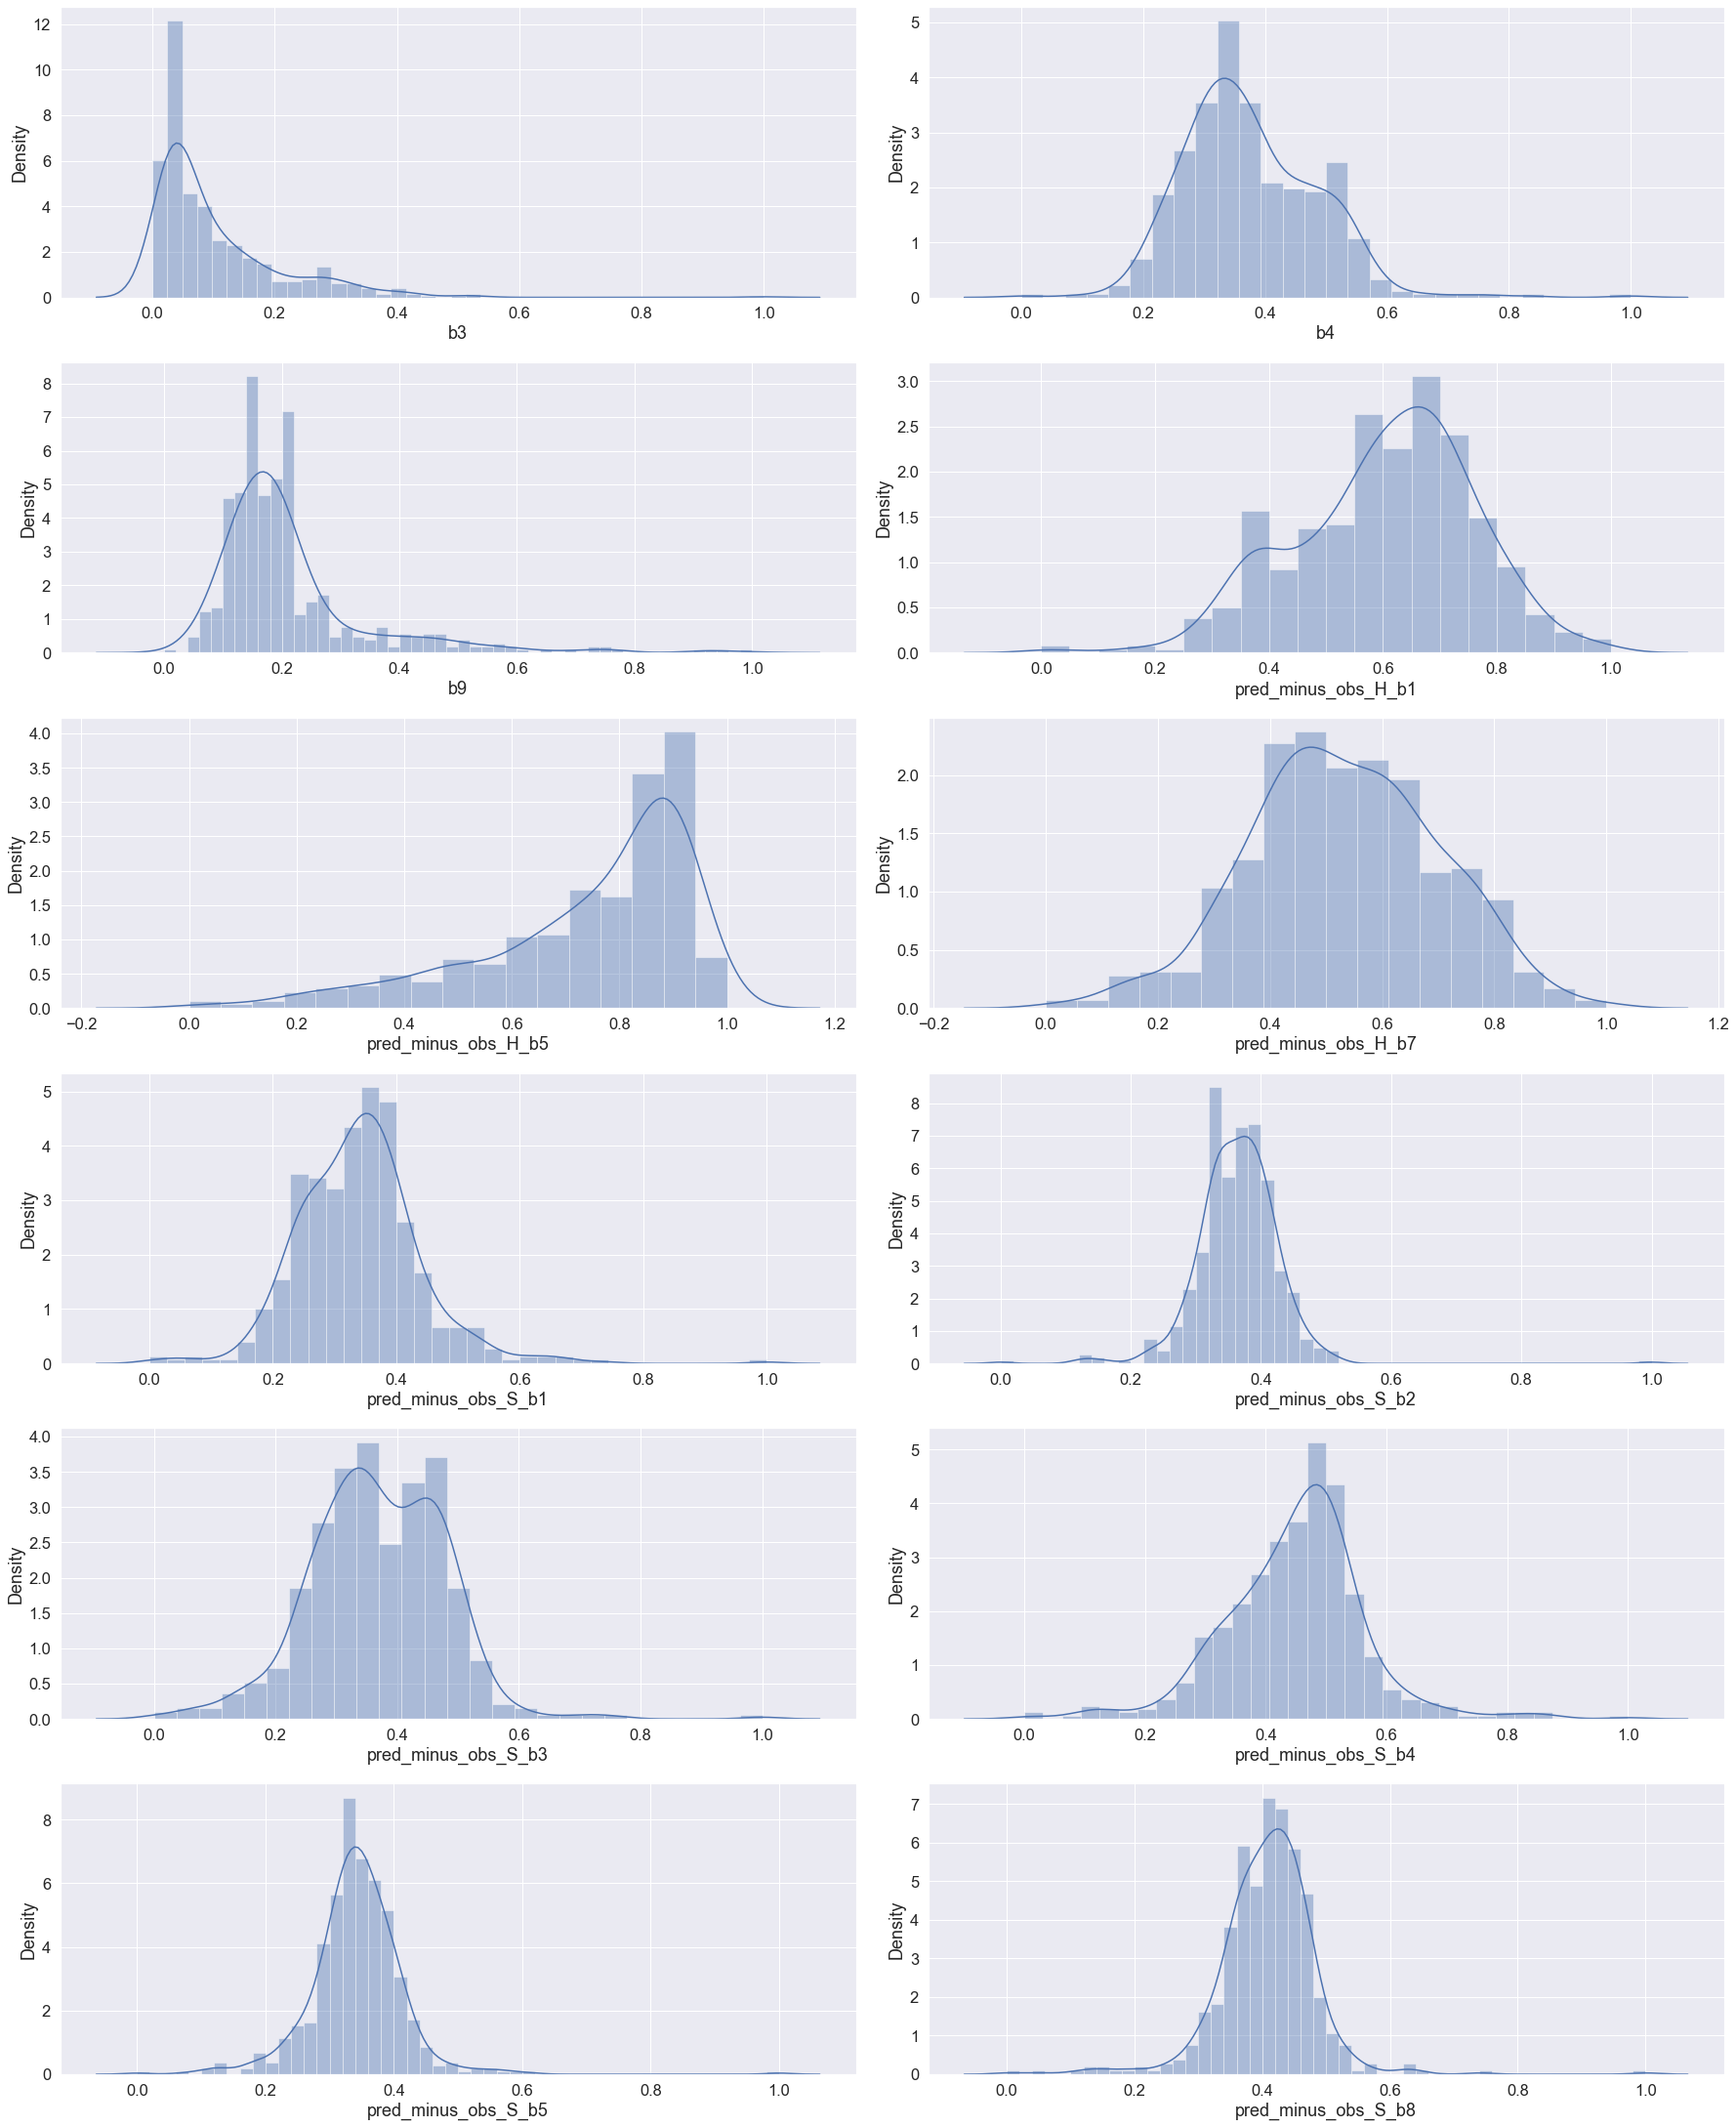

In [51]:
#plotting distribution before scaled
sns.set(rc={'figure.figsize':(25,35)},font_scale=1.5)
i=1
for column in num_cols:
    plt.subplot(7,2,i)
    sns.distplot(X_scaled[column])
    i=i+1
plt.tight_layout()
plt.show()

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, stratify=Y, random_state=0)

In [53]:
#SVM with default parameter
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

svc = SVC()
svc.fit(X_train, Y_train)
y_test_pred = svc.predict(X_test)
y_train_pred = svc.predict(X_train)
print("Train Accuracy Score: ")
print(accuracy_score(Y_train,y_train_pred))
print("Test Accuracy Score: ")
print(accuracy_score(Y_test,y_test_pred))

Train Accuracy Score: 
0.9016393442622951
Test Accuracy Score: 
0.8535031847133758


In [54]:
#confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, recall_score
cm_test = confusion_matrix(Y_test,y_test_pred)
cm_test

array([[21,  0,  0,  5],
       [ 0, 41,  2,  5],
       [ 0,  2, 23,  0],
       [ 6,  3,  0, 49]], dtype=int64)

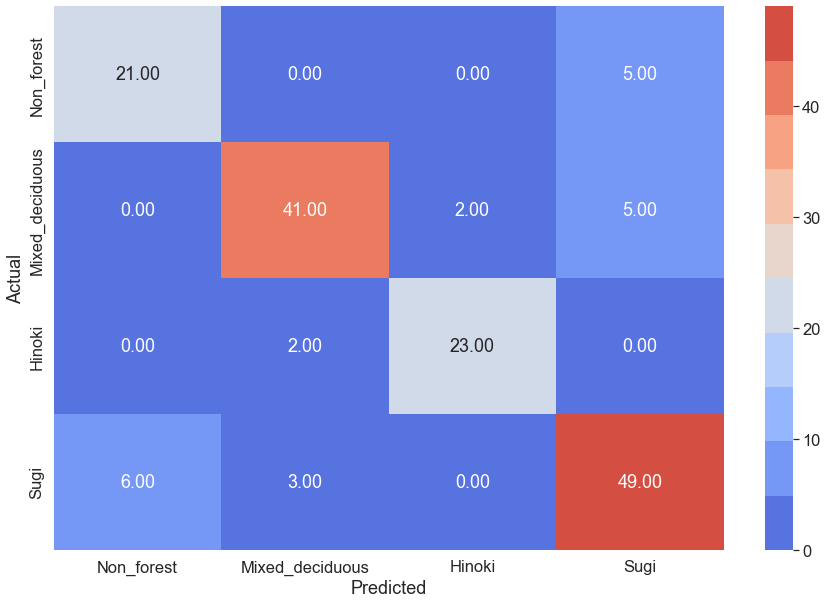

In [55]:
plt.figure(figsize=(15,10))

sns.heatmap(cm_test, annot=True, fmt='.2f', annot_kws={'fontsize':18}, xticklabels=['Non_forest', 'Mixed_deciduous', 'Hinoki', 'Sugi'], yticklabels=['Non_forest', 'Mixed_deciduous', 'Hinoki', 'Sugi'], cmap=sns.color_palette("coolwarm",10))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [56]:
#classification report
print("Training Classification Report:")
print(classification_report(Y_train,y_train_pred))
print("Test Classification Report:")
print(classification_report(Y_test,y_test_pred))

Training Classification Report:
                  precision    recall  f1-score   support

         Hinoki        0.88      0.93      0.90        60
Mixed_deciduous        0.91      0.87      0.89       111
     Non_forest        0.92      0.83      0.87        58
           Sugi        0.90      0.94      0.92       137

        accuracy                           0.90       366
       macro avg       0.90      0.89      0.90       366
    weighted avg       0.90      0.90      0.90       366

Test Classification Report:
                  precision    recall  f1-score   support

         Hinoki        0.78      0.81      0.79        26
Mixed_deciduous        0.89      0.85      0.87        48
     Non_forest        0.92      0.92      0.92        25
           Sugi        0.83      0.84      0.84        58

        accuracy                           0.85       157
       macro avg       0.85      0.86      0.86       157
    weighted avg       0.85      0.85      0.85       157



Train Accuracy Score: 
0.8852459016393442
Test Accuracy Score: 
0.8598726114649682



Confusion Matrix:
 [[21  0  0  5]
 [ 0 39  2  7]
 [ 0  1 23  1]
 [ 4  2  0 52]]



Training Classification Report:
                  precision    recall  f1-score   support

         Hinoki        0.89      0.92      0.90        60
Mixed_deciduous        0.89      0.85      0.87       111
     Non_forest        0.92      0.78      0.84        58
           Sugi        0.87      0.95      0.91       137

        accuracy                           0.89       366
       macro avg       0.89      0.87      0.88       366
    weighted avg       0.89      0.89      0.88       366

Test Classification Report:
                  precision    recall  f1-score   support

         Hinoki        0.84      0.81      0.82        26
Mixed_deciduous        0.93      0.81      0.87        48
     Non_forest        0.92      0.92      0.92        25
           Sugi        0.80      0.90      0.85        58

        accu

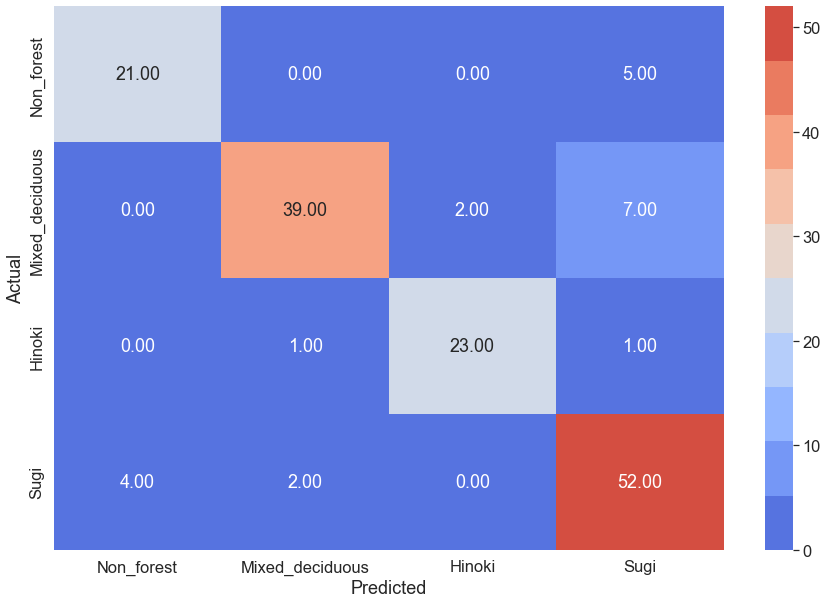

In [57]:
#SVM Linear Kernel

svc = SVC(kernel='linear')
svc.fit(X_train, Y_train)
y_test_pred = svc.predict(X_test)
y_train_pred = svc.predict(X_train)
print("Train Accuracy Score: ")
print(accuracy_score(Y_train,y_train_pred))
print("Test Accuracy Score: ")
print(accuracy_score(Y_test,y_test_pred))
print("\n\n")
cm_test = confusion_matrix(Y_test,y_test_pred)
print("Confusion Matrix:\n", cm_test)
print("\n\n")
print("Training Classification Report:")
print(classification_report(Y_train,y_train_pred))
print("Test Classification Report:")
print(classification_report(Y_test,y_test_pred))

plt.figure(figsize=(15,10))

sns.heatmap(cm_test, annot=True, fmt='.2f', annot_kws={'fontsize':18}, xticklabels=['Non_forest', 'Mixed_deciduous', 'Hinoki', 'Sugi'], yticklabels=['Non_forest', 'Mixed_deciduous', 'Hinoki', 'Sugi'], cmap=sns.color_palette("coolwarm",10))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Train Accuracy Score: 
0.9016393442622951
Test Accuracy Score: 
0.8535031847133758



Confusion Matrix:
 [[21  0  0  5]
 [ 0 41  2  5]
 [ 0  2 23  0]
 [ 6  3  0 49]]



Training Classification Report:
                  precision    recall  f1-score   support

         Hinoki        0.88      0.93      0.90        60
Mixed_deciduous        0.91      0.87      0.89       111
     Non_forest        0.92      0.83      0.87        58
           Sugi        0.90      0.94      0.92       137

        accuracy                           0.90       366
       macro avg       0.90      0.89      0.90       366
    weighted avg       0.90      0.90      0.90       366

Test Classification Report:
                  precision    recall  f1-score   support

         Hinoki        0.78      0.81      0.79        26
Mixed_deciduous        0.89      0.85      0.87        48
     Non_forest        0.92      0.92      0.92        25
           Sugi        0.83      0.84      0.84        58

        accu

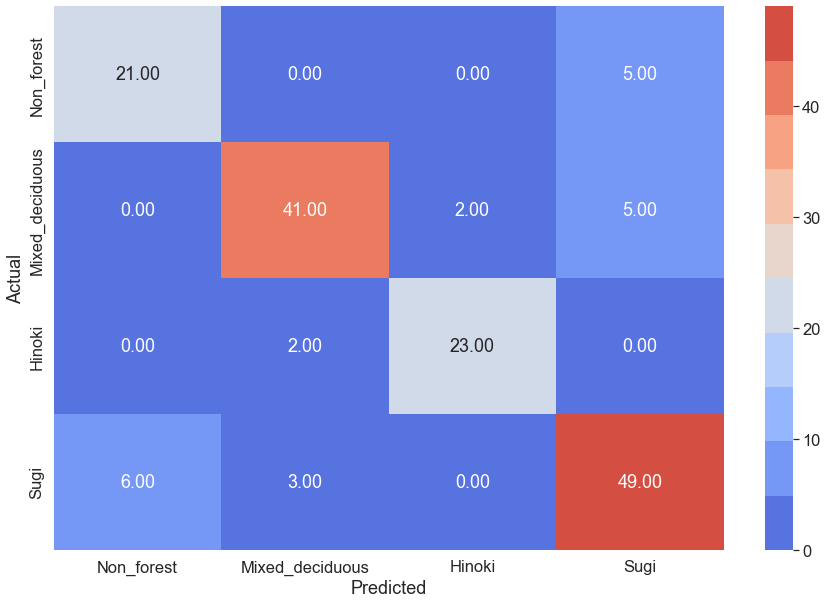

In [58]:
#SVM RBF Kernel

svc = SVC(kernel='rbf')
svc.fit(X_train, Y_train)
y_test_pred = svc.predict(X_test)
y_train_pred = svc.predict(X_train)
print("Train Accuracy Score: ")
print(accuracy_score(Y_train,y_train_pred))
print("Test Accuracy Score: ")
print(accuracy_score(Y_test,y_test_pred))
print("\n\n")
cm_test = confusion_matrix(Y_test,y_test_pred)
print("Confusion Matrix:\n", cm_test)
print("\n\n")
print("Training Classification Report:")
print(classification_report(Y_train,y_train_pred))
print("Test Classification Report:")
print(classification_report(Y_test,y_test_pred))

plt.figure(figsize=(15,10))

sns.heatmap(cm_test, annot=True, fmt='.2f', annot_kws={'fontsize':18}, xticklabels=['Non_forest', 'Mixed_deciduous', 'Hinoki', 'Sugi'], yticklabels=['Non_forest', 'Mixed_deciduous', 'Hinoki', 'Sugi'], cmap=sns.color_palette("coolwarm",10))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [59]:
#hyper-parameter tuning
from sklearn.model_selection import cross_val_score

In [60]:
#C parameter
C_range = list(np.arange(0.1,2,0.1))
train_acc_score = []
test_acc_score = []
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    train_scores = cross_val_score(svc, X_train, Y_train, scoring='accuracy')
    train_acc_score.append(train_scores.mean())
    test_scores = cross_val_score(svc, X_test, Y_test, scoring='accuracy')
    test_acc_score.append(test_scores.mean())
print("Train Accuracy Scores:",train_acc_score)
print("\nTest Accuracy Scores:", test_acc_score)

Train Accuracy Scores: [0.49448352462051093, 0.6747500925583118, 0.8089226212513884, 0.836319881525361, 0.8553868937430581, 0.8526841910403554, 0.8581266197704555, 0.8718252499074417, 0.8744909292854498, 0.8771936319881526, 0.8771936319881524, 0.8798963346908553, 0.8826360607182524, 0.882673084042947, 0.8854128100703443, 0.8854128100703443, 0.8881525360977417, 0.8881525360977417, 0.8881525360977417]

Test Accuracy Scores: [0.3693548387096775, 0.4526209677419355, 0.6310483870967741, 0.6689516129032258, 0.701008064516129, 0.7580645161290323, 0.7899193548387098, 0.8280241935483872, 0.8405241935483871, 0.8405241935483871, 0.8405241935483871, 0.8405241935483871, 0.8534274193548388, 0.8471774193548388, 0.8409274193548388, 0.8409274193548388, 0.8409274193548388, 0.8409274193548388, 0.8471774193548388]


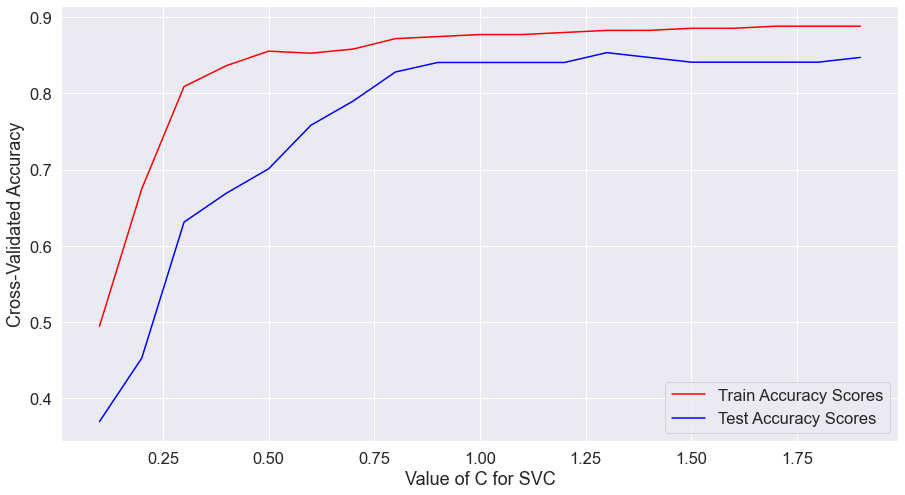

In [61]:
#plotting train and accuracy scores for Linear Kernel

C_range = list(np.arange(0.1,2,0.1))
plt.figure(figsize=(15,8))
#plt.subplot(1,2,1)
plt.plot(C_range, train_acc_score, color='red')
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')
#plt.title('C Vs Train Accuracy Scores')
#plt.subplot(1,2,2)
plt.plot(C_range, test_acc_score, color='blue')
#plt.xlabel('Value of C for SVC')
#plt.ylabel('Cross-Validated Accuracy')
#plt.title('C Vs Test Accuracy Scores')
plt.legend(['Train Accuracy Scores', 'Test Accuracy Scores'], loc='lower right')
plt.show()

Train Accuracy Scores: [0.37424924924924924, 0.37424924924924924, 0.37424924924924924, 0.7215465465465466]

Test Accuracy Scores: [0.37, 0.37, 0.37, 0.49124999999999996]


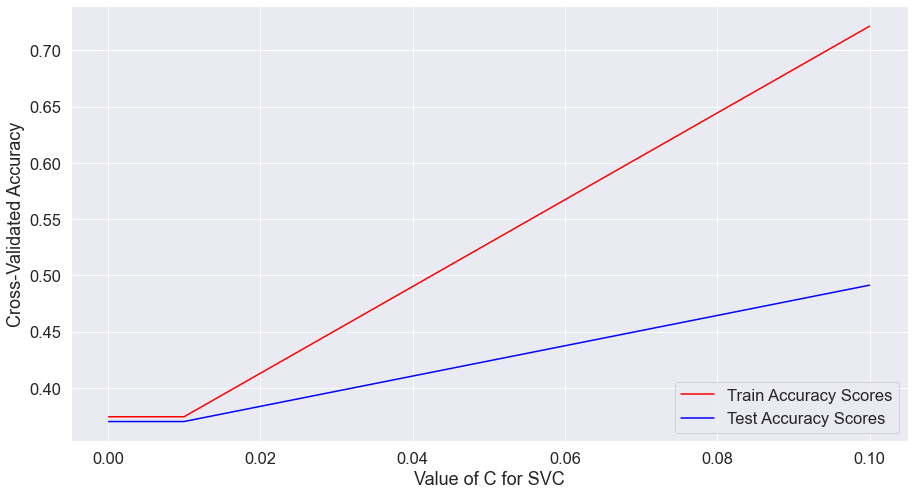

In [62]:
#plotting train and accuracy scores for RBF Kernel

gamma_range = [0.0001, 0.001, 0.01, 0.1]
train_acc_score = []
test_acc_score = []
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    train_scores = cross_val_score(svc, X_train, Y_train, cv=10, scoring='accuracy')
    train_acc_score.append(train_scores.mean())
    test_scores = cross_val_score(svc, X_test, Y_test, cv=10, scoring='accuracy')
    test_acc_score.append(test_scores.mean())
print("Train Accuracy Scores:",train_acc_score)
print("\nTest Accuracy Scores:", test_acc_score)

plt.figure(figsize=(15,8))
#plt.subplot(1,2,1)
plt.plot(gamma_range, train_acc_score, color='red')
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')
#plt.title('C Vs Train Accuracy Scores')
#plt.subplot(1,2,2)
plt.plot(gamma_range, test_acc_score, color='blue')
#plt.xlabel('Value of C for SVC')
#plt.ylabel('Cross-Validated Accuracy')
#plt.title('C Vs Test Accuracy Scores')
#plt.xticks(np.arange(0.0001, 0.001, 0.01, 0.1), rotation=45)
plt.legend(['Train Accuracy Scores', 'Test Accuracy Scores'], loc='lower right')
plt.show()

In [63]:
#Fine-tuning the parameters using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {'C':list(np.arange(0.1,10,0.1)),
              'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
              'kernel': ['linear', 'rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

grid.fit(X_train, Y_train)

Fitting 5 folds for each of 990 candidates, totalling 4950 fits
[CV 1/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.514 total time=   0.0s
[CV 2/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.521 total time=   0.0s
[CV 3/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.479 total time=   0.0s
[CV 4/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.466 total time=   0.0s
[CV 5/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.493 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.378 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.384 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 1/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.514 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=0.001, kernel=line

[CV 3/5] END C=0.30000000000000004, gamma=0.0001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 4/5] END C=0.30000000000000004, gamma=0.0001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 5/5] END C=0.30000000000000004, gamma=0.0001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 1/5] END C=0.30000000000000004, gamma=0.001, kernel=linear;, score=0.743 total time=   0.0s
[CV 2/5] END C=0.30000000000000004, gamma=0.001, kernel=linear;, score=0.767 total time=   0.0s
[CV 3/5] END C=0.30000000000000004, gamma=0.001, kernel=linear;, score=0.822 total time=   0.0s
[CV 4/5] END C=0.30000000000000004, gamma=0.001, kernel=linear;, score=0.877 total time=   0.0s
[CV 5/5] END C=0.30000000000000004, gamma=0.001, kernel=linear;, score=0.836 total time=   0.0s
[CV 1/5] END C=0.30000000000000004, gamma=0.001, kernel=rbf;, score=0.378 total time=   0.0s
[CV 2/5] END C=0.30000000000000004, gamma=0.001, kernel=rbf;, score=0.384 total time=   0.0s
[CV 3/5] END C=0.30000000000000004, gamma=0.001, ker

[CV 5/5] END ....C=0.5, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 1/5] END ..C=0.5, gamma=0.01, kernel=linear;, score=0.784 total time=   0.0s
[CV 2/5] END ..C=0.5, gamma=0.01, kernel=linear;, score=0.849 total time=   0.0s
[CV 3/5] END ..C=0.5, gamma=0.01, kernel=linear;, score=0.863 total time=   0.0s
[CV 4/5] END ..C=0.5, gamma=0.01, kernel=linear;, score=0.918 total time=   0.0s
[CV 5/5] END ..C=0.5, gamma=0.01, kernel=linear;, score=0.863 total time=   0.0s
[CV 1/5] END .....C=0.5, gamma=0.01, kernel=rbf;, score=0.378 total time=   0.0s
[CV 2/5] END .....C=0.5, gamma=0.01, kernel=rbf;, score=0.384 total time=   0.0s
[CV 3/5] END .....C=0.5, gamma=0.01, kernel=rbf;, score=0.370 total time=   0.0s
[CV 4/5] END .....C=0.5, gamma=0.01, kernel=rbf;, score=0.370 total time=   0.0s
[CV 5/5] END .....C=0.5, gamma=0.01, kernel=rbf;, score=0.370 total time=   0.0s
[CV 1/5] END ...C=0.5, gamma=0.1, kernel=linear;, score=0.784 total time=   0.0s
[CV 2/5] END ...C=0.5, gamma

[CV 2/5] END C=0.7000000000000001, gamma=0.01, kernel=rbf;, score=0.384 total time=   0.0s
[CV 3/5] END C=0.7000000000000001, gamma=0.01, kernel=rbf;, score=0.370 total time=   0.0s
[CV 4/5] END C=0.7000000000000001, gamma=0.01, kernel=rbf;, score=0.370 total time=   0.0s
[CV 5/5] END C=0.7000000000000001, gamma=0.01, kernel=rbf;, score=0.370 total time=   0.0s
[CV 1/5] END C=0.7000000000000001, gamma=0.1, kernel=linear;, score=0.784 total time=   0.0s
[CV 2/5] END C=0.7000000000000001, gamma=0.1, kernel=linear;, score=0.849 total time=   0.0s
[CV 3/5] END C=0.7000000000000001, gamma=0.1, kernel=linear;, score=0.849 total time=   0.0s
[CV 4/5] END C=0.7000000000000001, gamma=0.1, kernel=linear;, score=0.918 total time=   0.0s
[CV 5/5] END C=0.7000000000000001, gamma=0.1, kernel=linear;, score=0.890 total time=   0.0s
[CV 1/5] END C=0.7000000000000001, gamma=0.1, kernel=rbf;, score=0.608 total time=   0.0s
[CV 2/5] END C=0.7000000000000001, gamma=0.1, kernel=rbf;, score=0.589 total time

[CV 2/5] END .....C=0.9, gamma=0.01, kernel=rbf;, score=0.384 total time=   0.0s
[CV 3/5] END .....C=0.9, gamma=0.01, kernel=rbf;, score=0.370 total time=   0.0s
[CV 4/5] END .....C=0.9, gamma=0.01, kernel=rbf;, score=0.370 total time=   0.0s
[CV 5/5] END .....C=0.9, gamma=0.01, kernel=rbf;, score=0.370 total time=   0.0s
[CV 1/5] END ...C=0.9, gamma=0.1, kernel=linear;, score=0.811 total time=   0.0s
[CV 2/5] END ...C=0.9, gamma=0.1, kernel=linear;, score=0.863 total time=   0.0s
[CV 3/5] END ...C=0.9, gamma=0.1, kernel=linear;, score=0.863 total time=   0.0s
[CV 4/5] END ...C=0.9, gamma=0.1, kernel=linear;, score=0.932 total time=   0.0s
[CV 5/5] END ...C=0.9, gamma=0.1, kernel=linear;, score=0.904 total time=   0.0s
[CV 1/5] END ......C=0.9, gamma=0.1, kernel=rbf;, score=0.662 total time=   0.0s
[CV 2/5] END ......C=0.9, gamma=0.1, kernel=rbf;, score=0.616 total time=   0.0s
[CV 3/5] END ......C=0.9, gamma=0.1, kernel=rbf;, score=0.616 total time=   0.0s
[CV 4/5] END ......C=0.9, ga

[CV 3/5] END ...C=1.1, gamma=0.1, kernel=linear;, score=0.863 total time=   0.0s
[CV 4/5] END ...C=1.1, gamma=0.1, kernel=linear;, score=0.932 total time=   0.0s
[CV 5/5] END ...C=1.1, gamma=0.1, kernel=linear;, score=0.918 total time=   0.0s
[CV 1/5] END ......C=1.1, gamma=0.1, kernel=rbf;, score=0.730 total time=   0.0s
[CV 2/5] END ......C=1.1, gamma=0.1, kernel=rbf;, score=0.658 total time=   0.0s
[CV 3/5] END ......C=1.1, gamma=0.1, kernel=rbf;, score=0.726 total time=   0.0s
[CV 4/5] END ......C=1.1, gamma=0.1, kernel=rbf;, score=0.726 total time=   0.0s
[CV 5/5] END ......C=1.1, gamma=0.1, kernel=rbf;, score=0.726 total time=   0.0s
[CV 1/5] END .....C=1.1, gamma=1, kernel=linear;, score=0.824 total time=   0.0s
[CV 2/5] END .....C=1.1, gamma=1, kernel=linear;, score=0.849 total time=   0.0s
[CV 3/5] END .....C=1.1, gamma=1, kernel=linear;, score=0.863 total time=   0.0s
[CV 4/5] END .....C=1.1, gamma=1, kernel=linear;, score=0.932 total time=   0.0s
[CV 5/5] END .....C=1.1, gam

[CV 5/5] END C=1.3000000000000003, gamma=0.01, kernel=rbf;, score=0.370 total time=   0.0s
[CV 1/5] END C=1.3000000000000003, gamma=0.1, kernel=linear;, score=0.838 total time=   0.0s
[CV 2/5] END C=1.3000000000000003, gamma=0.1, kernel=linear;, score=0.863 total time=   0.0s
[CV 3/5] END C=1.3000000000000003, gamma=0.1, kernel=linear;, score=0.863 total time=   0.0s
[CV 4/5] END C=1.3000000000000003, gamma=0.1, kernel=linear;, score=0.932 total time=   0.0s
[CV 5/5] END C=1.3000000000000003, gamma=0.1, kernel=linear;, score=0.918 total time=   0.0s
[CV 1/5] END C=1.3000000000000003, gamma=0.1, kernel=rbf;, score=0.743 total time=   0.0s
[CV 2/5] END C=1.3000000000000003, gamma=0.1, kernel=rbf;, score=0.726 total time=   0.0s
[CV 3/5] END C=1.3000000000000003, gamma=0.1, kernel=rbf;, score=0.781 total time=   0.0s
[CV 4/5] END C=1.3000000000000003, gamma=0.1, kernel=rbf;, score=0.808 total time=   0.0s
[CV 5/5] END C=1.3000000000000003, gamma=0.1, kernel=rbf;, score=0.822 total time=  

[CV 4/5] END C=1.5000000000000002, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 5/5] END C=1.5000000000000002, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 1/5] END C=1.5000000000000002, gamma=0.01, kernel=linear;, score=0.824 total time=   0.0s
[CV 2/5] END C=1.5000000000000002, gamma=0.01, kernel=linear;, score=0.863 total time=   0.0s
[CV 3/5] END C=1.5000000000000002, gamma=0.01, kernel=linear;, score=0.863 total time=   0.0s
[CV 4/5] END C=1.5000000000000002, gamma=0.01, kernel=linear;, score=0.945 total time=   0.0s
[CV 5/5] END C=1.5000000000000002, gamma=0.01, kernel=linear;, score=0.932 total time=   0.0s
[CV 1/5] END C=1.5000000000000002, gamma=0.01, kernel=rbf;, score=0.378 total time=   0.0s
[CV 2/5] END C=1.5000000000000002, gamma=0.01, kernel=rbf;, score=0.384 total time=   0.0s
[CV 3/5] END C=1.5000000000000002, gamma=0.01, kernel=rbf;, score=0.370 total time=   0.0s
[CV 4/5] END C=1.5000000000000002, gamma=0.01, kernel=rbf;, score=0.370 t

[CV 3/5] END C=1.7000000000000002, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 4/5] END C=1.7000000000000002, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 5/5] END C=1.7000000000000002, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 1/5] END C=1.7000000000000002, gamma=0.01, kernel=linear;, score=0.824 total time=   0.0s
[CV 2/5] END C=1.7000000000000002, gamma=0.01, kernel=linear;, score=0.877 total time=   0.0s
[CV 3/5] END C=1.7000000000000002, gamma=0.01, kernel=linear;, score=0.863 total time=   0.0s
[CV 4/5] END C=1.7000000000000002, gamma=0.01, kernel=linear;, score=0.945 total time=   0.0s
[CV 5/5] END C=1.7000000000000002, gamma=0.01, kernel=linear;, score=0.932 total time=   0.0s
[CV 1/5] END C=1.7000000000000002, gamma=0.01, kernel=rbf;, score=0.378 total time=   0.0s
[CV 2/5] END C=1.7000000000000002, gamma=0.01, kernel=rbf;, score=0.384 total time=   0.0s
[CV 3/5] END C=1.7000000000000002, gamma=0.01, kernel=rbf;, score=0.370 

[CV 3/5] END C=1.9000000000000001, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 4/5] END C=1.9000000000000001, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 5/5] END C=1.9000000000000001, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 1/5] END C=1.9000000000000001, gamma=0.01, kernel=linear;, score=0.824 total time=   0.0s
[CV 2/5] END C=1.9000000000000001, gamma=0.01, kernel=linear;, score=0.877 total time=   0.0s
[CV 3/5] END C=1.9000000000000001, gamma=0.01, kernel=linear;, score=0.863 total time=   0.0s
[CV 4/5] END C=1.9000000000000001, gamma=0.01, kernel=linear;, score=0.945 total time=   0.0s
[CV 5/5] END C=1.9000000000000001, gamma=0.01, kernel=linear;, score=0.932 total time=   0.0s
[CV 1/5] END C=1.9000000000000001, gamma=0.01, kernel=rbf;, score=0.378 total time=   0.0s
[CV 2/5] END C=1.9000000000000001, gamma=0.01, kernel=rbf;, score=0.384 total time=   0.0s
[CV 3/5] END C=1.9000000000000001, gamma=0.01, kernel=rbf;, score=0.370 

[CV 4/5] END ....C=2.1, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 5/5] END ....C=2.1, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 1/5] END ..C=2.1, gamma=0.01, kernel=linear;, score=0.824 total time=   0.0s
[CV 2/5] END ..C=2.1, gamma=0.01, kernel=linear;, score=0.877 total time=   0.0s
[CV 3/5] END ..C=2.1, gamma=0.01, kernel=linear;, score=0.863 total time=   0.0s
[CV 4/5] END ..C=2.1, gamma=0.01, kernel=linear;, score=0.945 total time=   0.0s
[CV 5/5] END ..C=2.1, gamma=0.01, kernel=linear;, score=0.932 total time=   0.0s
[CV 1/5] END .....C=2.1, gamma=0.01, kernel=rbf;, score=0.378 total time=   0.0s
[CV 2/5] END .....C=2.1, gamma=0.01, kernel=rbf;, score=0.384 total time=   0.0s
[CV 3/5] END .....C=2.1, gamma=0.01, kernel=rbf;, score=0.370 total time=   0.0s
[CV 4/5] END .....C=2.1, gamma=0.01, kernel=rbf;, score=0.370 total time=   0.0s
[CV 5/5] END .....C=2.1, gamma=0.01, kernel=rbf;, score=0.370 total time=   0.0s
[CV 1/5] END ...C=2.1, gamma

[CV 3/5] END C=2.3000000000000003, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 4/5] END C=2.3000000000000003, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 5/5] END C=2.3000000000000003, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 1/5] END C=2.3000000000000003, gamma=0.01, kernel=linear;, score=0.824 total time=   0.0s
[CV 2/5] END C=2.3000000000000003, gamma=0.01, kernel=linear;, score=0.877 total time=   0.0s
[CV 3/5] END C=2.3000000000000003, gamma=0.01, kernel=linear;, score=0.863 total time=   0.0s
[CV 4/5] END C=2.3000000000000003, gamma=0.01, kernel=linear;, score=0.945 total time=   0.0s
[CV 5/5] END C=2.3000000000000003, gamma=0.01, kernel=linear;, score=0.932 total time=   0.0s
[CV 1/5] END C=2.3000000000000003, gamma=0.01, kernel=rbf;, score=0.378 total time=   0.0s
[CV 2/5] END C=2.3000000000000003, gamma=0.01, kernel=rbf;, score=0.384 total time=   0.0s
[CV 3/5] END C=2.3000000000000003, gamma=0.01, kernel=rbf;, score=0.370 

[CV 1/5] END C=2.5000000000000004, gamma=0.001, kernel=linear;, score=0.824 total time=   0.0s
[CV 2/5] END C=2.5000000000000004, gamma=0.001, kernel=linear;, score=0.877 total time=   0.0s
[CV 3/5] END C=2.5000000000000004, gamma=0.001, kernel=linear;, score=0.863 total time=   0.0s
[CV 4/5] END C=2.5000000000000004, gamma=0.001, kernel=linear;, score=0.945 total time=   0.0s
[CV 5/5] END C=2.5000000000000004, gamma=0.001, kernel=linear;, score=0.932 total time=   0.0s
[CV 1/5] END C=2.5000000000000004, gamma=0.001, kernel=rbf;, score=0.378 total time=   0.0s
[CV 2/5] END C=2.5000000000000004, gamma=0.001, kernel=rbf;, score=0.384 total time=   0.0s
[CV 3/5] END C=2.5000000000000004, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 4/5] END C=2.5000000000000004, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 5/5] END C=2.5000000000000004, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 1/5] END C=2.5000000000000004, gamma=0.01, kernel=linear;, sc

[CV 3/5] END .C=2.7, gamma=0.001, kernel=linear;, score=0.863 total time=   0.0s
[CV 4/5] END .C=2.7, gamma=0.001, kernel=linear;, score=0.959 total time=   0.0s
[CV 5/5] END .C=2.7, gamma=0.001, kernel=linear;, score=0.945 total time=   0.0s
[CV 1/5] END ....C=2.7, gamma=0.001, kernel=rbf;, score=0.378 total time=   0.0s
[CV 2/5] END ....C=2.7, gamma=0.001, kernel=rbf;, score=0.384 total time=   0.0s
[CV 3/5] END ....C=2.7, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 4/5] END ....C=2.7, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 5/5] END ....C=2.7, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 1/5] END ..C=2.7, gamma=0.01, kernel=linear;, score=0.824 total time=   0.0s
[CV 2/5] END ..C=2.7, gamma=0.01, kernel=linear;, score=0.877 total time=   0.0s
[CV 3/5] END ..C=2.7, gamma=0.01, kernel=linear;, score=0.863 total time=   0.0s
[CV 4/5] END ..C=2.7, gamma=0.01, kernel=linear;, score=0.959 total time=   0.0s
[CV 5/5] END ..C=2.7, gamma=

[CV 5/5] END C=2.9000000000000004, gamma=0.0001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 1/5] END C=2.9000000000000004, gamma=0.001, kernel=linear;, score=0.824 total time=   0.0s
[CV 2/5] END C=2.9000000000000004, gamma=0.001, kernel=linear;, score=0.877 total time=   0.0s
[CV 3/5] END C=2.9000000000000004, gamma=0.001, kernel=linear;, score=0.863 total time=   0.0s
[CV 4/5] END C=2.9000000000000004, gamma=0.001, kernel=linear;, score=0.959 total time=   0.0s
[CV 5/5] END C=2.9000000000000004, gamma=0.001, kernel=linear;, score=0.945 total time=   0.0s
[CV 1/5] END C=2.9000000000000004, gamma=0.001, kernel=rbf;, score=0.378 total time=   0.0s
[CV 2/5] END C=2.9000000000000004, gamma=0.001, kernel=rbf;, score=0.384 total time=   0.0s
[CV 3/5] END C=2.9000000000000004, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 4/5] END C=2.9000000000000004, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 5/5] END C=2.9000000000000004, gamma=0.001, kernel=rbf;, sco

[CV 3/5] END C=3.0000000000000004, gamma=1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 4/5] END C=3.0000000000000004, gamma=1, kernel=rbf;, score=0.918 total time=   0.0s
[CV 5/5] END C=3.0000000000000004, gamma=1, kernel=rbf;, score=0.932 total time=   0.0s
[CV 1/5] END C=3.1, gamma=0.0001, kernel=linear;, score=0.824 total time=   0.0s
[CV 2/5] END C=3.1, gamma=0.0001, kernel=linear;, score=0.877 total time=   0.0s
[CV 3/5] END C=3.1, gamma=0.0001, kernel=linear;, score=0.863 total time=   0.0s
[CV 4/5] END C=3.1, gamma=0.0001, kernel=linear;, score=0.959 total time=   0.0s
[CV 5/5] END C=3.1, gamma=0.0001, kernel=linear;, score=0.945 total time=   0.0s
[CV 1/5] END ...C=3.1, gamma=0.0001, kernel=rbf;, score=0.378 total time=   0.0s
[CV 2/5] END ...C=3.1, gamma=0.0001, kernel=rbf;, score=0.384 total time=   0.0s
[CV 3/5] END ...C=3.1, gamma=0.0001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 4/5] END ...C=3.1, gamma=0.0001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 5/5

[CV 5/5] END C=3.3000000000000003, gamma=0.0001, kernel=linear;, score=0.945 total time=   0.0s
[CV 1/5] END C=3.3000000000000003, gamma=0.0001, kernel=rbf;, score=0.378 total time=   0.0s
[CV 2/5] END C=3.3000000000000003, gamma=0.0001, kernel=rbf;, score=0.384 total time=   0.0s
[CV 3/5] END C=3.3000000000000003, gamma=0.0001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 4/5] END C=3.3000000000000003, gamma=0.0001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 5/5] END C=3.3000000000000003, gamma=0.0001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 1/5] END C=3.3000000000000003, gamma=0.001, kernel=linear;, score=0.838 total time=   0.0s
[CV 2/5] END C=3.3000000000000003, gamma=0.001, kernel=linear;, score=0.877 total time=   0.0s
[CV 3/5] END C=3.3000000000000003, gamma=0.001, kernel=linear;, score=0.863 total time=   0.0s
[CV 4/5] END C=3.3000000000000003, gamma=0.001, kernel=linear;, score=0.959 total time=   0.0s
[CV 5/5] END C=3.3000000000000003, gamma=0.001, kernel=line

[CV 4/5] END C=3.5000000000000004, gamma=0.0001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 5/5] END C=3.5000000000000004, gamma=0.0001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 1/5] END C=3.5000000000000004, gamma=0.001, kernel=linear;, score=0.824 total time=   0.0s
[CV 2/5] END C=3.5000000000000004, gamma=0.001, kernel=linear;, score=0.877 total time=   0.0s
[CV 3/5] END C=3.5000000000000004, gamma=0.001, kernel=linear;, score=0.863 total time=   0.0s
[CV 4/5] END C=3.5000000000000004, gamma=0.001, kernel=linear;, score=0.959 total time=   0.0s
[CV 5/5] END C=3.5000000000000004, gamma=0.001, kernel=linear;, score=0.945 total time=   0.0s
[CV 1/5] END C=3.5000000000000004, gamma=0.001, kernel=rbf;, score=0.378 total time=   0.0s
[CV 2/5] END C=3.5000000000000004, gamma=0.001, kernel=rbf;, score=0.384 total time=   0.0s
[CV 3/5] END C=3.5000000000000004, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 4/5] END C=3.5000000000000004, gamma=0.001, kernel=rbf;, sc

[CV 5/5] END ...C=3.7, gamma=0.0001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 1/5] END .C=3.7, gamma=0.001, kernel=linear;, score=0.838 total time=   0.0s
[CV 2/5] END .C=3.7, gamma=0.001, kernel=linear;, score=0.877 total time=   0.0s
[CV 3/5] END .C=3.7, gamma=0.001, kernel=linear;, score=0.863 total time=   0.0s
[CV 4/5] END .C=3.7, gamma=0.001, kernel=linear;, score=0.959 total time=   0.0s
[CV 5/5] END .C=3.7, gamma=0.001, kernel=linear;, score=0.945 total time=   0.0s
[CV 1/5] END ....C=3.7, gamma=0.001, kernel=rbf;, score=0.378 total time=   0.0s
[CV 2/5] END ....C=3.7, gamma=0.001, kernel=rbf;, score=0.384 total time=   0.0s
[CV 3/5] END ....C=3.7, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 4/5] END ....C=3.7, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 5/5] END ....C=3.7, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 1/5] END ..C=3.7, gamma=0.01, kernel=linear;, score=0.838 total time=   0.0s
[CV 2/5] END ..C=3.7, gamma=

[CV 5/5] END C=3.9000000000000004, gamma=0.0001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 1/5] END C=3.9000000000000004, gamma=0.001, kernel=linear;, score=0.824 total time=   0.0s
[CV 2/5] END C=3.9000000000000004, gamma=0.001, kernel=linear;, score=0.877 total time=   0.0s
[CV 3/5] END C=3.9000000000000004, gamma=0.001, kernel=linear;, score=0.863 total time=   0.0s
[CV 4/5] END C=3.9000000000000004, gamma=0.001, kernel=linear;, score=0.959 total time=   0.0s
[CV 5/5] END C=3.9000000000000004, gamma=0.001, kernel=linear;, score=0.945 total time=   0.0s
[CV 1/5] END C=3.9000000000000004, gamma=0.001, kernel=rbf;, score=0.378 total time=   0.0s
[CV 2/5] END C=3.9000000000000004, gamma=0.001, kernel=rbf;, score=0.384 total time=   0.0s
[CV 3/5] END C=3.9000000000000004, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 4/5] END C=3.9000000000000004, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 5/5] END C=3.9000000000000004, gamma=0.001, kernel=rbf;, sco

[CV 3/5] END .C=4.1, gamma=0.001, kernel=linear;, score=0.863 total time=   0.0s
[CV 4/5] END .C=4.1, gamma=0.001, kernel=linear;, score=0.959 total time=   0.0s
[CV 5/5] END .C=4.1, gamma=0.001, kernel=linear;, score=0.945 total time=   0.0s
[CV 1/5] END ....C=4.1, gamma=0.001, kernel=rbf;, score=0.378 total time=   0.0s
[CV 2/5] END ....C=4.1, gamma=0.001, kernel=rbf;, score=0.384 total time=   0.0s
[CV 3/5] END ....C=4.1, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 4/5] END ....C=4.1, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 5/5] END ....C=4.1, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 1/5] END ..C=4.1, gamma=0.01, kernel=linear;, score=0.824 total time=   0.0s
[CV 2/5] END ..C=4.1, gamma=0.01, kernel=linear;, score=0.877 total time=   0.0s
[CV 3/5] END ..C=4.1, gamma=0.01, kernel=linear;, score=0.863 total time=   0.0s
[CV 4/5] END ..C=4.1, gamma=0.01, kernel=linear;, score=0.959 total time=   0.0s
[CV 5/5] END ..C=4.1, gamma=

[CV 5/5] END .....C=4.3, gamma=0.01, kernel=rbf;, score=0.397 total time=   0.0s
[CV 1/5] END ...C=4.3, gamma=0.1, kernel=linear;, score=0.824 total time=   0.0s
[CV 2/5] END ...C=4.3, gamma=0.1, kernel=linear;, score=0.877 total time=   0.0s
[CV 3/5] END ...C=4.3, gamma=0.1, kernel=linear;, score=0.863 total time=   0.0s
[CV 4/5] END ...C=4.3, gamma=0.1, kernel=linear;, score=0.932 total time=   0.0s
[CV 5/5] END ...C=4.3, gamma=0.1, kernel=linear;, score=0.945 total time=   0.0s
[CV 1/5] END ......C=4.3, gamma=0.1, kernel=rbf;, score=0.784 total time=   0.0s
[CV 2/5] END ......C=4.3, gamma=0.1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 3/5] END ......C=4.3, gamma=0.1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 4/5] END ......C=4.3, gamma=0.1, kernel=rbf;, score=0.932 total time=   0.0s
[CV 5/5] END ......C=4.3, gamma=0.1, kernel=rbf;, score=0.918 total time=   0.0s
[CV 1/5] END .....C=4.3, gamma=1, kernel=linear;, score=0.824 total time=   0.0s
[CV 2/5] END .....C=4.3, gam

[CV 2/5] END ...C=4.5, gamma=0.1, kernel=linear;, score=0.877 total time=   0.0s
[CV 3/5] END ...C=4.5, gamma=0.1, kernel=linear;, score=0.863 total time=   0.0s
[CV 4/5] END ...C=4.5, gamma=0.1, kernel=linear;, score=0.932 total time=   0.0s
[CV 5/5] END ...C=4.5, gamma=0.1, kernel=linear;, score=0.945 total time=   0.0s
[CV 1/5] END ......C=4.5, gamma=0.1, kernel=rbf;, score=0.797 total time=   0.0s
[CV 2/5] END ......C=4.5, gamma=0.1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 3/5] END ......C=4.5, gamma=0.1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 4/5] END ......C=4.5, gamma=0.1, kernel=rbf;, score=0.932 total time=   0.0s
[CV 5/5] END ......C=4.5, gamma=0.1, kernel=rbf;, score=0.918 total time=   0.0s
[CV 1/5] END .....C=4.5, gamma=1, kernel=linear;, score=0.824 total time=   0.0s
[CV 2/5] END .....C=4.5, gamma=1, kernel=linear;, score=0.877 total time=   0.0s
[CV 3/5] END .....C=4.5, gamma=1, kernel=linear;, score=0.863 total time=   0.0s
[CV 4/5] END .....C=4.5, gam

[CV 3/5] END ......C=4.7, gamma=0.1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 4/5] END ......C=4.7, gamma=0.1, kernel=rbf;, score=0.932 total time=   0.0s
[CV 5/5] END ......C=4.7, gamma=0.1, kernel=rbf;, score=0.918 total time=   0.0s
[CV 1/5] END .....C=4.7, gamma=1, kernel=linear;, score=0.824 total time=   0.0s
[CV 2/5] END .....C=4.7, gamma=1, kernel=linear;, score=0.877 total time=   0.0s
[CV 3/5] END .....C=4.7, gamma=1, kernel=linear;, score=0.863 total time=   0.0s
[CV 4/5] END .....C=4.7, gamma=1, kernel=linear;, score=0.932 total time=   0.0s
[CV 5/5] END .....C=4.7, gamma=1, kernel=linear;, score=0.945 total time=   0.0s
[CV 1/5] END ........C=4.7, gamma=1, kernel=rbf;, score=0.824 total time=   0.0s
[CV 2/5] END ........C=4.7, gamma=1, kernel=rbf;, score=0.877 total time=   0.0s
[CV 3/5] END ........C=4.7, gamma=1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 4/5] END ........C=4.7, gamma=1, kernel=rbf;, score=0.932 total time=   0.0s
[CV 5/5] END ........C=4.7, 

[CV 2/5] END C=5.0, gamma=0.0001, kernel=linear;, score=0.877 total time=   0.0s
[CV 3/5] END C=5.0, gamma=0.0001, kernel=linear;, score=0.863 total time=   0.0s
[CV 4/5] END C=5.0, gamma=0.0001, kernel=linear;, score=0.932 total time=   0.0s
[CV 5/5] END C=5.0, gamma=0.0001, kernel=linear;, score=0.945 total time=   0.0s
[CV 1/5] END ...C=5.0, gamma=0.0001, kernel=rbf;, score=0.378 total time=   0.0s
[CV 2/5] END ...C=5.0, gamma=0.0001, kernel=rbf;, score=0.384 total time=   0.0s
[CV 3/5] END ...C=5.0, gamma=0.0001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 4/5] END ...C=5.0, gamma=0.0001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 5/5] END ...C=5.0, gamma=0.0001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 1/5] END .C=5.0, gamma=0.001, kernel=linear;, score=0.824 total time=   0.0s
[CV 2/5] END .C=5.0, gamma=0.001, kernel=linear;, score=0.877 total time=   0.0s
[CV 3/5] END .C=5.0, gamma=0.001, kernel=linear;, score=0.863 total time=   0.0s
[CV 4/5] END .C=5.0, gamma=0

[CV 4/5] END ...C=5.2, gamma=0.0001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 5/5] END ...C=5.2, gamma=0.0001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 1/5] END .C=5.2, gamma=0.001, kernel=linear;, score=0.824 total time=   0.0s
[CV 2/5] END .C=5.2, gamma=0.001, kernel=linear;, score=0.877 total time=   0.0s
[CV 3/5] END .C=5.2, gamma=0.001, kernel=linear;, score=0.863 total time=   0.0s
[CV 4/5] END .C=5.2, gamma=0.001, kernel=linear;, score=0.945 total time=   0.0s
[CV 5/5] END .C=5.2, gamma=0.001, kernel=linear;, score=0.945 total time=   0.0s
[CV 1/5] END ....C=5.2, gamma=0.001, kernel=rbf;, score=0.378 total time=   0.0s
[CV 2/5] END ....C=5.2, gamma=0.001, kernel=rbf;, score=0.384 total time=   0.0s
[CV 3/5] END ....C=5.2, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 4/5] END ....C=5.2, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 5/5] END ....C=5.2, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 1/5] END ..C=5.2, gamma=

[CV 3/5] END .....C=5.4, gamma=0.01, kernel=rbf;, score=0.507 total time=   0.0s
[CV 4/5] END .....C=5.4, gamma=0.01, kernel=rbf;, score=0.534 total time=   0.0s
[CV 5/5] END .....C=5.4, gamma=0.01, kernel=rbf;, score=0.507 total time=   0.0s
[CV 1/5] END ...C=5.4, gamma=0.1, kernel=linear;, score=0.824 total time=   0.0s
[CV 2/5] END ...C=5.4, gamma=0.1, kernel=linear;, score=0.877 total time=   0.0s
[CV 3/5] END ...C=5.4, gamma=0.1, kernel=linear;, score=0.877 total time=   0.0s
[CV 4/5] END ...C=5.4, gamma=0.1, kernel=linear;, score=0.945 total time=   0.0s
[CV 5/5] END ...C=5.4, gamma=0.1, kernel=linear;, score=0.945 total time=   0.0s
[CV 1/5] END ......C=5.4, gamma=0.1, kernel=rbf;, score=0.824 total time=   0.0s
[CV 2/5] END ......C=5.4, gamma=0.1, kernel=rbf;, score=0.849 total time=   0.0s
[CV 3/5] END ......C=5.4, gamma=0.1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 4/5] END ......C=5.4, gamma=0.1, kernel=rbf;, score=0.932 total time=   0.0s
[CV 5/5] END ......C=5.4, ga

[CV 5/5] END .....C=5.6, gamma=0.01, kernel=rbf;, score=0.548 total time=   0.0s
[CV 1/5] END ...C=5.6, gamma=0.1, kernel=linear;, score=0.838 total time=   0.0s
[CV 2/5] END ...C=5.6, gamma=0.1, kernel=linear;, score=0.877 total time=   0.0s
[CV 3/5] END ...C=5.6, gamma=0.1, kernel=linear;, score=0.877 total time=   0.0s
[CV 4/5] END ...C=5.6, gamma=0.1, kernel=linear;, score=0.945 total time=   0.0s
[CV 5/5] END ...C=5.6, gamma=0.1, kernel=linear;, score=0.945 total time=   0.0s
[CV 1/5] END ......C=5.6, gamma=0.1, kernel=rbf;, score=0.824 total time=   0.0s
[CV 2/5] END ......C=5.6, gamma=0.1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 3/5] END ......C=5.6, gamma=0.1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 4/5] END ......C=5.6, gamma=0.1, kernel=rbf;, score=0.932 total time=   0.0s
[CV 5/5] END ......C=5.6, gamma=0.1, kernel=rbf;, score=0.918 total time=   0.0s
[CV 1/5] END .....C=5.6, gamma=1, kernel=linear;, score=0.838 total time=   0.0s
[CV 2/5] END .....C=5.6, gam

[CV 2/5] END ...C=5.8, gamma=0.1, kernel=linear;, score=0.877 total time=   0.0s
[CV 3/5] END ...C=5.8, gamma=0.1, kernel=linear;, score=0.877 total time=   0.0s
[CV 4/5] END ...C=5.8, gamma=0.1, kernel=linear;, score=0.945 total time=   0.0s
[CV 5/5] END ...C=5.8, gamma=0.1, kernel=linear;, score=0.945 total time=   0.0s
[CV 1/5] END ......C=5.8, gamma=0.1, kernel=rbf;, score=0.838 total time=   0.0s
[CV 2/5] END ......C=5.8, gamma=0.1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 3/5] END ......C=5.8, gamma=0.1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 4/5] END ......C=5.8, gamma=0.1, kernel=rbf;, score=0.932 total time=   0.0s
[CV 5/5] END ......C=5.8, gamma=0.1, kernel=rbf;, score=0.918 total time=   0.0s
[CV 1/5] END .....C=5.8, gamma=1, kernel=linear;, score=0.838 total time=   0.0s
[CV 2/5] END .....C=5.8, gamma=1, kernel=linear;, score=0.877 total time=   0.0s
[CV 3/5] END .....C=5.8, gamma=1, kernel=linear;, score=0.877 total time=   0.0s
[CV 4/5] END .....C=5.8, gam

[CV 5/5] END ...C=6.0, gamma=0.1, kernel=linear;, score=0.945 total time=   0.0s
[CV 1/5] END ......C=6.0, gamma=0.1, kernel=rbf;, score=0.838 total time=   0.0s
[CV 2/5] END ......C=6.0, gamma=0.1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 3/5] END ......C=6.0, gamma=0.1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 4/5] END ......C=6.0, gamma=0.1, kernel=rbf;, score=0.932 total time=   0.0s
[CV 5/5] END ......C=6.0, gamma=0.1, kernel=rbf;, score=0.918 total time=   0.0s
[CV 1/5] END .....C=6.0, gamma=1, kernel=linear;, score=0.838 total time=   0.0s
[CV 2/5] END .....C=6.0, gamma=1, kernel=linear;, score=0.877 total time=   0.0s
[CV 3/5] END .....C=6.0, gamma=1, kernel=linear;, score=0.877 total time=   0.0s
[CV 4/5] END .....C=6.0, gamma=1, kernel=linear;, score=0.945 total time=   0.0s
[CV 5/5] END .....C=6.0, gamma=1, kernel=linear;, score=0.945 total time=   0.0s
[CV 1/5] END ........C=6.0, gamma=1, kernel=rbf;, score=0.838 total time=   0.0s
[CV 2/5] END ........C=6.0, 

[CV 4/5] END ......C=6.2, gamma=0.1, kernel=rbf;, score=0.932 total time=   0.0s
[CV 5/5] END ......C=6.2, gamma=0.1, kernel=rbf;, score=0.918 total time=   0.0s
[CV 1/5] END .....C=6.2, gamma=1, kernel=linear;, score=0.838 total time=   0.0s
[CV 2/5] END .....C=6.2, gamma=1, kernel=linear;, score=0.877 total time=   0.0s
[CV 3/5] END .....C=6.2, gamma=1, kernel=linear;, score=0.877 total time=   0.0s
[CV 4/5] END .....C=6.2, gamma=1, kernel=linear;, score=0.945 total time=   0.0s
[CV 5/5] END .....C=6.2, gamma=1, kernel=linear;, score=0.945 total time=   0.0s
[CV 1/5] END ........C=6.2, gamma=1, kernel=rbf;, score=0.838 total time=   0.0s
[CV 2/5] END ........C=6.2, gamma=1, kernel=rbf;, score=0.877 total time=   0.0s
[CV 3/5] END ........C=6.2, gamma=1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 4/5] END ........C=6.2, gamma=1, kernel=rbf;, score=0.932 total time=   0.0s
[CV 5/5] END ........C=6.2, gamma=1, kernel=rbf;, score=0.918 total time=   0.0s
[CV 1/5] END C=6.3, gamma=0.

[CV 1/5] END ...C=6.5, gamma=0.0001, kernel=rbf;, score=0.378 total time=   0.0s
[CV 2/5] END ...C=6.5, gamma=0.0001, kernel=rbf;, score=0.384 total time=   0.0s
[CV 3/5] END ...C=6.5, gamma=0.0001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 4/5] END ...C=6.5, gamma=0.0001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 5/5] END ...C=6.5, gamma=0.0001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 1/5] END .C=6.5, gamma=0.001, kernel=linear;, score=0.838 total time=   0.0s
[CV 2/5] END .C=6.5, gamma=0.001, kernel=linear;, score=0.877 total time=   0.0s
[CV 3/5] END .C=6.5, gamma=0.001, kernel=linear;, score=0.877 total time=   0.0s
[CV 4/5] END .C=6.5, gamma=0.001, kernel=linear;, score=0.945 total time=   0.0s
[CV 5/5] END .C=6.5, gamma=0.001, kernel=linear;, score=0.945 total time=   0.0s
[CV 1/5] END ....C=6.5, gamma=0.001, kernel=rbf;, score=0.378 total time=   0.0s
[CV 2/5] END ....C=6.5, gamma=0.001, kernel=rbf;, score=0.384 total time=   0.0s
[CV 3/5] END ....C=6.5, gamm

[CV 4/5] END ...C=6.7, gamma=0.0001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 5/5] END ...C=6.7, gamma=0.0001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 1/5] END .C=6.7, gamma=0.001, kernel=linear;, score=0.838 total time=   0.0s
[CV 2/5] END .C=6.7, gamma=0.001, kernel=linear;, score=0.877 total time=   0.0s
[CV 3/5] END .C=6.7, gamma=0.001, kernel=linear;, score=0.877 total time=   0.0s
[CV 4/5] END .C=6.7, gamma=0.001, kernel=linear;, score=0.945 total time=   0.0s
[CV 5/5] END .C=6.7, gamma=0.001, kernel=linear;, score=0.945 total time=   0.0s
[CV 1/5] END ....C=6.7, gamma=0.001, kernel=rbf;, score=0.378 total time=   0.0s
[CV 2/5] END ....C=6.7, gamma=0.001, kernel=rbf;, score=0.384 total time=   0.0s
[CV 3/5] END ....C=6.7, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 4/5] END ....C=6.7, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 5/5] END ....C=6.7, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 1/5] END ..C=6.7, gamma=

[CV 3/5] END .C=6.9, gamma=0.001, kernel=linear;, score=0.890 total time=   0.0s
[CV 4/5] END .C=6.9, gamma=0.001, kernel=linear;, score=0.945 total time=   0.0s
[CV 5/5] END .C=6.9, gamma=0.001, kernel=linear;, score=0.932 total time=   0.0s
[CV 1/5] END ....C=6.9, gamma=0.001, kernel=rbf;, score=0.378 total time=   0.0s
[CV 2/5] END ....C=6.9, gamma=0.001, kernel=rbf;, score=0.384 total time=   0.0s
[CV 3/5] END ....C=6.9, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 4/5] END ....C=6.9, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 5/5] END ....C=6.9, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 1/5] END ..C=6.9, gamma=0.01, kernel=linear;, score=0.838 total time=   0.0s
[CV 2/5] END ..C=6.9, gamma=0.01, kernel=linear;, score=0.877 total time=   0.0s
[CV 3/5] END ..C=6.9, gamma=0.01, kernel=linear;, score=0.890 total time=   0.0s
[CV 4/5] END ..C=6.9, gamma=0.01, kernel=linear;, score=0.945 total time=   0.0s
[CV 5/5] END ..C=6.9, gamma=

[CV 5/5] END ....C=7.1, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 1/5] END ..C=7.1, gamma=0.01, kernel=linear;, score=0.838 total time=   0.0s
[CV 2/5] END ..C=7.1, gamma=0.01, kernel=linear;, score=0.877 total time=   0.0s
[CV 3/5] END ..C=7.1, gamma=0.01, kernel=linear;, score=0.890 total time=   0.0s
[CV 4/5] END ..C=7.1, gamma=0.01, kernel=linear;, score=0.945 total time=   0.0s
[CV 5/5] END ..C=7.1, gamma=0.01, kernel=linear;, score=0.932 total time=   0.0s
[CV 1/5] END .....C=7.1, gamma=0.01, kernel=rbf;, score=0.622 total time=   0.0s
[CV 2/5] END .....C=7.1, gamma=0.01, kernel=rbf;, score=0.589 total time=   0.0s
[CV 3/5] END .....C=7.1, gamma=0.01, kernel=rbf;, score=0.603 total time=   0.0s
[CV 4/5] END .....C=7.1, gamma=0.01, kernel=rbf;, score=0.616 total time=   0.0s
[CV 5/5] END .....C=7.1, gamma=0.01, kernel=rbf;, score=0.616 total time=   0.0s
[CV 1/5] END ...C=7.1, gamma=0.1, kernel=linear;, score=0.838 total time=   0.0s
[CV 2/5] END ...C=7.1, gamma

[CV 2/5] END ..C=7.3, gamma=0.01, kernel=linear;, score=0.877 total time=   0.0s
[CV 3/5] END ..C=7.3, gamma=0.01, kernel=linear;, score=0.890 total time=   0.0s
[CV 4/5] END ..C=7.3, gamma=0.01, kernel=linear;, score=0.945 total time=   0.0s
[CV 5/5] END ..C=7.3, gamma=0.01, kernel=linear;, score=0.932 total time=   0.0s
[CV 1/5] END .....C=7.3, gamma=0.01, kernel=rbf;, score=0.622 total time=   0.0s
[CV 2/5] END .....C=7.3, gamma=0.01, kernel=rbf;, score=0.603 total time=   0.0s
[CV 3/5] END .....C=7.3, gamma=0.01, kernel=rbf;, score=0.616 total time=   0.0s
[CV 4/5] END .....C=7.3, gamma=0.01, kernel=rbf;, score=0.616 total time=   0.0s
[CV 5/5] END .....C=7.3, gamma=0.01, kernel=rbf;, score=0.616 total time=   0.0s
[CV 1/5] END ...C=7.3, gamma=0.1, kernel=linear;, score=0.838 total time=   0.0s
[CV 2/5] END ...C=7.3, gamma=0.1, kernel=linear;, score=0.877 total time=   0.0s
[CV 3/5] END ...C=7.3, gamma=0.1, kernel=linear;, score=0.890 total time=   0.0s
[CV 4/5] END ...C=7.3, gamma

[CV 3/5] END .....C=7.5, gamma=0.01, kernel=rbf;, score=0.616 total time=   0.0s
[CV 4/5] END .....C=7.5, gamma=0.01, kernel=rbf;, score=0.616 total time=   0.0s
[CV 5/5] END .....C=7.5, gamma=0.01, kernel=rbf;, score=0.616 total time=   0.0s
[CV 1/5] END ...C=7.5, gamma=0.1, kernel=linear;, score=0.838 total time=   0.0s
[CV 2/5] END ...C=7.5, gamma=0.1, kernel=linear;, score=0.877 total time=   0.0s
[CV 3/5] END ...C=7.5, gamma=0.1, kernel=linear;, score=0.890 total time=   0.0s
[CV 4/5] END ...C=7.5, gamma=0.1, kernel=linear;, score=0.945 total time=   0.0s
[CV 5/5] END ...C=7.5, gamma=0.1, kernel=linear;, score=0.932 total time=   0.0s
[CV 1/5] END ......C=7.5, gamma=0.1, kernel=rbf;, score=0.838 total time=   0.0s
[CV 2/5] END ......C=7.5, gamma=0.1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 3/5] END ......C=7.5, gamma=0.1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 4/5] END ......C=7.5, gamma=0.1, kernel=rbf;, score=0.945 total time=   0.0s
[CV 5/5] END ......C=7.5, ga

[CV 4/5] END .....C=7.7, gamma=0.01, kernel=rbf;, score=0.616 total time=   0.0s
[CV 5/5] END .....C=7.7, gamma=0.01, kernel=rbf;, score=0.616 total time=   0.0s
[CV 1/5] END ...C=7.7, gamma=0.1, kernel=linear;, score=0.838 total time=   0.0s
[CV 2/5] END ...C=7.7, gamma=0.1, kernel=linear;, score=0.877 total time=   0.0s
[CV 3/5] END ...C=7.7, gamma=0.1, kernel=linear;, score=0.890 total time=   0.0s
[CV 4/5] END ...C=7.7, gamma=0.1, kernel=linear;, score=0.945 total time=   0.0s
[CV 5/5] END ...C=7.7, gamma=0.1, kernel=linear;, score=0.932 total time=   0.0s
[CV 1/5] END ......C=7.7, gamma=0.1, kernel=rbf;, score=0.838 total time=   0.0s
[CV 2/5] END ......C=7.7, gamma=0.1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 3/5] END ......C=7.7, gamma=0.1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 4/5] END ......C=7.7, gamma=0.1, kernel=rbf;, score=0.945 total time=   0.0s
[CV 5/5] END ......C=7.7, gamma=0.1, kernel=rbf;, score=0.918 total time=   0.0s
[CV 1/5] END .....C=7.7, gam

[CV 3/5] END ......C=7.9, gamma=0.1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 4/5] END ......C=7.9, gamma=0.1, kernel=rbf;, score=0.945 total time=   0.0s
[CV 5/5] END ......C=7.9, gamma=0.1, kernel=rbf;, score=0.918 total time=   0.0s
[CV 1/5] END .....C=7.9, gamma=1, kernel=linear;, score=0.838 total time=   0.0s
[CV 2/5] END .....C=7.9, gamma=1, kernel=linear;, score=0.877 total time=   0.0s
[CV 3/5] END .....C=7.9, gamma=1, kernel=linear;, score=0.890 total time=   0.0s
[CV 4/5] END .....C=7.9, gamma=1, kernel=linear;, score=0.945 total time=   0.0s
[CV 5/5] END .....C=7.9, gamma=1, kernel=linear;, score=0.932 total time=   0.0s
[CV 1/5] END ........C=7.9, gamma=1, kernel=rbf;, score=0.838 total time=   0.0s
[CV 2/5] END ........C=7.9, gamma=1, kernel=rbf;, score=0.877 total time=   0.0s
[CV 3/5] END ........C=7.9, gamma=1, kernel=rbf;, score=0.877 total time=   0.0s
[CV 4/5] END ........C=7.9, gamma=1, kernel=rbf;, score=0.945 total time=   0.0s
[CV 5/5] END ........C=7.9, 

[CV 1/5] END .....C=8.1, gamma=1, kernel=linear;, score=0.838 total time=   0.0s
[CV 2/5] END .....C=8.1, gamma=1, kernel=linear;, score=0.877 total time=   0.0s
[CV 3/5] END .....C=8.1, gamma=1, kernel=linear;, score=0.890 total time=   0.0s
[CV 4/5] END .....C=8.1, gamma=1, kernel=linear;, score=0.945 total time=   0.0s
[CV 5/5] END .....C=8.1, gamma=1, kernel=linear;, score=0.932 total time=   0.0s
[CV 1/5] END ........C=8.1, gamma=1, kernel=rbf;, score=0.838 total time=   0.0s
[CV 2/5] END ........C=8.1, gamma=1, kernel=rbf;, score=0.877 total time=   0.0s
[CV 3/5] END ........C=8.1, gamma=1, kernel=rbf;, score=0.877 total time=   0.0s
[CV 4/5] END ........C=8.1, gamma=1, kernel=rbf;, score=0.945 total time=   0.0s
[CV 5/5] END ........C=8.1, gamma=1, kernel=rbf;, score=0.918 total time=   0.0s
[CV 1/5] END C=8.2, gamma=0.0001, kernel=linear;, score=0.838 total time=   0.0s
[CV 2/5] END C=8.2, gamma=0.0001, kernel=linear;, score=0.877 total time=   0.0s
[CV 3/5] END C=8.2, gamma=0.

[CV 1/5] END C=8.4, gamma=0.0001, kernel=linear;, score=0.838 total time=   0.0s
[CV 2/5] END C=8.4, gamma=0.0001, kernel=linear;, score=0.877 total time=   0.0s
[CV 3/5] END C=8.4, gamma=0.0001, kernel=linear;, score=0.890 total time=   0.0s
[CV 4/5] END C=8.4, gamma=0.0001, kernel=linear;, score=0.945 total time=   0.0s
[CV 5/5] END C=8.4, gamma=0.0001, kernel=linear;, score=0.932 total time=   0.0s
[CV 1/5] END ...C=8.4, gamma=0.0001, kernel=rbf;, score=0.378 total time=   0.0s
[CV 2/5] END ...C=8.4, gamma=0.0001, kernel=rbf;, score=0.384 total time=   0.0s
[CV 3/5] END ...C=8.4, gamma=0.0001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 4/5] END ...C=8.4, gamma=0.0001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 5/5] END ...C=8.4, gamma=0.0001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 1/5] END .C=8.4, gamma=0.001, kernel=linear;, score=0.838 total time=   0.0s
[CV 2/5] END .C=8.4, gamma=0.001, kernel=linear;, score=0.877 total time=   0.0s
[CV 3/5] END .C=8.4, gamma=0

[CV 3/5] END ...C=8.6, gamma=0.0001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 4/5] END ...C=8.6, gamma=0.0001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 5/5] END ...C=8.6, gamma=0.0001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 1/5] END .C=8.6, gamma=0.001, kernel=linear;, score=0.838 total time=   0.0s
[CV 2/5] END .C=8.6, gamma=0.001, kernel=linear;, score=0.877 total time=   0.0s
[CV 3/5] END .C=8.6, gamma=0.001, kernel=linear;, score=0.890 total time=   0.0s
[CV 4/5] END .C=8.6, gamma=0.001, kernel=linear;, score=0.945 total time=   0.0s
[CV 5/5] END .C=8.6, gamma=0.001, kernel=linear;, score=0.932 total time=   0.0s
[CV 1/5] END ....C=8.6, gamma=0.001, kernel=rbf;, score=0.378 total time=   0.0s
[CV 2/5] END ....C=8.6, gamma=0.001, kernel=rbf;, score=0.384 total time=   0.0s
[CV 3/5] END ....C=8.6, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 4/5] END ....C=8.6, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 5/5] END ....C=8.6, gamm

[CV 3/5] END .C=8.8, gamma=0.001, kernel=linear;, score=0.890 total time=   0.0s
[CV 4/5] END .C=8.8, gamma=0.001, kernel=linear;, score=0.945 total time=   0.0s
[CV 5/5] END .C=8.8, gamma=0.001, kernel=linear;, score=0.932 total time=   0.0s
[CV 1/5] END ....C=8.8, gamma=0.001, kernel=rbf;, score=0.378 total time=   0.0s
[CV 2/5] END ....C=8.8, gamma=0.001, kernel=rbf;, score=0.384 total time=   0.0s
[CV 3/5] END ....C=8.8, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 4/5] END ....C=8.8, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 5/5] END ....C=8.8, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 1/5] END ..C=8.8, gamma=0.01, kernel=linear;, score=0.838 total time=   0.0s
[CV 2/5] END ..C=8.8, gamma=0.01, kernel=linear;, score=0.877 total time=   0.0s
[CV 3/5] END ..C=8.8, gamma=0.01, kernel=linear;, score=0.890 total time=   0.0s
[CV 4/5] END ..C=8.8, gamma=0.01, kernel=linear;, score=0.945 total time=   0.0s
[CV 5/5] END ..C=8.8, gamma=

[CV 5/5] END ..C=9.0, gamma=0.01, kernel=linear;, score=0.932 total time=   0.0s
[CV 1/5] END .....C=9.0, gamma=0.01, kernel=rbf;, score=0.676 total time=   0.0s
[CV 2/5] END .....C=9.0, gamma=0.01, kernel=rbf;, score=0.603 total time=   0.0s
[CV 3/5] END .....C=9.0, gamma=0.01, kernel=rbf;, score=0.630 total time=   0.0s
[CV 4/5] END .....C=9.0, gamma=0.01, kernel=rbf;, score=0.630 total time=   0.0s
[CV 5/5] END .....C=9.0, gamma=0.01, kernel=rbf;, score=0.644 total time=   0.0s
[CV 1/5] END ...C=9.0, gamma=0.1, kernel=linear;, score=0.838 total time=   0.0s
[CV 2/5] END ...C=9.0, gamma=0.1, kernel=linear;, score=0.877 total time=   0.0s
[CV 3/5] END ...C=9.0, gamma=0.1, kernel=linear;, score=0.890 total time=   0.0s
[CV 4/5] END ...C=9.0, gamma=0.1, kernel=linear;, score=0.945 total time=   0.0s
[CV 5/5] END ...C=9.0, gamma=0.1, kernel=linear;, score=0.932 total time=   0.0s
[CV 1/5] END ......C=9.0, gamma=0.1, kernel=rbf;, score=0.838 total time=   0.0s
[CV 2/5] END ......C=9.0, ga

[CV 4/5] END ......C=9.2, gamma=0.1, kernel=rbf;, score=0.945 total time=   0.0s
[CV 5/5] END ......C=9.2, gamma=0.1, kernel=rbf;, score=0.932 total time=   0.0s
[CV 1/5] END .....C=9.2, gamma=1, kernel=linear;, score=0.838 total time=   0.0s
[CV 2/5] END .....C=9.2, gamma=1, kernel=linear;, score=0.877 total time=   0.0s
[CV 3/5] END .....C=9.2, gamma=1, kernel=linear;, score=0.890 total time=   0.0s
[CV 4/5] END .....C=9.2, gamma=1, kernel=linear;, score=0.945 total time=   0.0s
[CV 5/5] END .....C=9.2, gamma=1, kernel=linear;, score=0.932 total time=   0.0s
[CV 1/5] END ........C=9.2, gamma=1, kernel=rbf;, score=0.824 total time=   0.0s
[CV 2/5] END ........C=9.2, gamma=1, kernel=rbf;, score=0.877 total time=   0.0s
[CV 3/5] END ........C=9.2, gamma=1, kernel=rbf;, score=0.890 total time=   0.0s
[CV 4/5] END ........C=9.2, gamma=1, kernel=rbf;, score=0.945 total time=   0.0s
[CV 5/5] END ........C=9.2, gamma=1, kernel=rbf;, score=0.904 total time=   0.0s
[CV 1/5] END C=9.3, gamma=0.

[CV 1/5] END ...C=9.5, gamma=0.0001, kernel=rbf;, score=0.378 total time=   0.0s
[CV 2/5] END ...C=9.5, gamma=0.0001, kernel=rbf;, score=0.384 total time=   0.0s
[CV 3/5] END ...C=9.5, gamma=0.0001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 4/5] END ...C=9.5, gamma=0.0001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 5/5] END ...C=9.5, gamma=0.0001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 1/5] END .C=9.5, gamma=0.001, kernel=linear;, score=0.838 total time=   0.0s
[CV 2/5] END .C=9.5, gamma=0.001, kernel=linear;, score=0.877 total time=   0.0s
[CV 3/5] END .C=9.5, gamma=0.001, kernel=linear;, score=0.890 total time=   0.0s
[CV 4/5] END .C=9.5, gamma=0.001, kernel=linear;, score=0.945 total time=   0.0s
[CV 5/5] END .C=9.5, gamma=0.001, kernel=linear;, score=0.932 total time=   0.0s
[CV 1/5] END ....C=9.5, gamma=0.001, kernel=rbf;, score=0.378 total time=   0.0s
[CV 2/5] END ....C=9.5, gamma=0.001, kernel=rbf;, score=0.384 total time=   0.0s
[CV 3/5] END ....C=9.5, gamm

[CV 2/5] END C=9.700000000000001, gamma=0.001, kernel=linear;, score=0.877 total time=   0.0s
[CV 3/5] END C=9.700000000000001, gamma=0.001, kernel=linear;, score=0.890 total time=   0.0s
[CV 4/5] END C=9.700000000000001, gamma=0.001, kernel=linear;, score=0.945 total time=   0.0s
[CV 5/5] END C=9.700000000000001, gamma=0.001, kernel=linear;, score=0.932 total time=   0.0s
[CV 1/5] END C=9.700000000000001, gamma=0.001, kernel=rbf;, score=0.378 total time=   0.0s
[CV 2/5] END C=9.700000000000001, gamma=0.001, kernel=rbf;, score=0.384 total time=   0.0s
[CV 3/5] END C=9.700000000000001, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 4/5] END C=9.700000000000001, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 5/5] END C=9.700000000000001, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 1/5] END C=9.700000000000001, gamma=0.01, kernel=linear;, score=0.838 total time=   0.0s
[CV 2/5] END C=9.700000000000001, gamma=0.01, kernel=linear;, score=0.877 to

[CV 4/5] END ....C=9.9, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 5/5] END ....C=9.9, gamma=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 1/5] END ..C=9.9, gamma=0.01, kernel=linear;, score=0.838 total time=   0.0s
[CV 2/5] END ..C=9.9, gamma=0.01, kernel=linear;, score=0.877 total time=   0.0s
[CV 3/5] END ..C=9.9, gamma=0.01, kernel=linear;, score=0.890 total time=   0.0s
[CV 4/5] END ..C=9.9, gamma=0.01, kernel=linear;, score=0.945 total time=   0.0s
[CV 5/5] END ..C=9.9, gamma=0.01, kernel=linear;, score=0.932 total time=   0.0s
[CV 1/5] END .....C=9.9, gamma=0.01, kernel=rbf;, score=0.703 total time=   0.0s
[CV 2/5] END .....C=9.9, gamma=0.01, kernel=rbf;, score=0.630 total time=   0.0s
[CV 3/5] END .....C=9.9, gamma=0.01, kernel=rbf;, score=0.671 total time=   0.0s
[CV 4/5] END .....C=9.9, gamma=0.01, kernel=rbf;, score=0.671 total time=   0.0s
[CV 5/5] END .....C=9.9, gamma=0.01, kernel=rbf;, score=0.671 total time=   0.0s
[CV 1/5] END ...C=9.9, gamma

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6,
                               0.7000000000000001, 0.8, 0.9, 1.0, 1.1,
                               1.2000000000000002, 1.3000000000000003,
                               1.4000000000000001, 1.5000000000000002, 1.6,
                               1.7000000000000002, 1.8000000000000003,
                               1.9000000000000001, 2.0, 2.1, 2.2,
                               2.3000000000000003, 2.4000000000000004,
                               2.5000000000000004, 2.6, 2.7, 2.8000000000000003,
                               2.9000000000000004, 3.0000000000000004, ...],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [64]:
#print best parameter after tuning
print("Best Parameters:\n",grid.best_params_)
print("Best Estimators:\n",grid.best_estimator_)

Best Parameters:
 {'C': 6.9, 'gamma': 0.0001, 'kernel': 'linear'}
Best Estimators:
 SVC(C=6.9, gamma=0.0001, kernel='linear')


In [65]:
grid_predictions = grid.predict(X_test)
print("Classification Report:\n",classification_report(Y_test, grid_predictions))

Classification Report:
                   precision    recall  f1-score   support

         Hinoki        0.84      0.81      0.82        26
Mixed_deciduous        0.91      0.85      0.88        48
     Non_forest        0.92      0.92      0.92        25
           Sugi        0.84      0.90      0.87        58

        accuracy                           0.87       157
       macro avg       0.88      0.87      0.87       157
    weighted avg       0.87      0.87      0.87       157



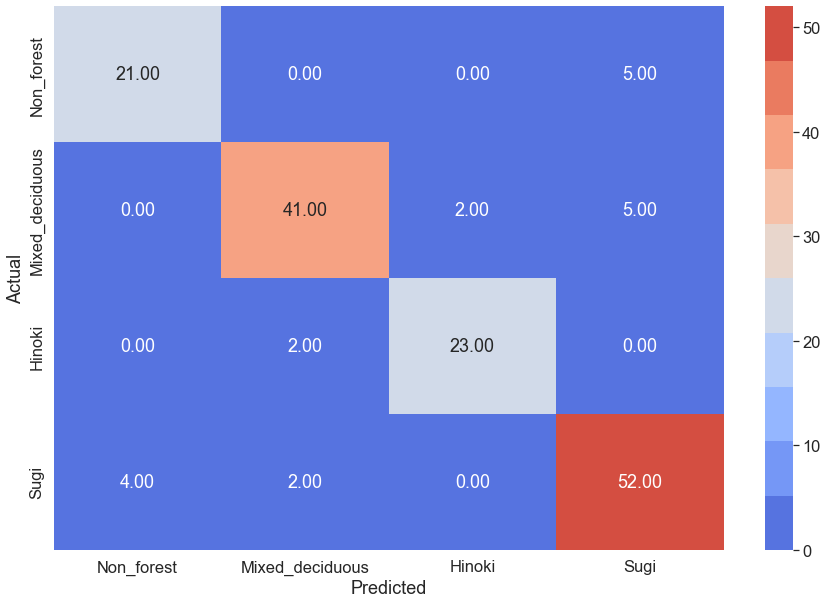

In [66]:
#confusion Matrix
cm = confusion_matrix(Y_test,grid_predictions)
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True, fmt='.2f', annot_kws={'fontsize':18}, xticklabels=['Non_forest', 'Mixed_deciduous', 'Hinoki', 'Sugi'], yticklabels=['Non_forest', 'Mixed_deciduous', 'Hinoki', 'Sugi'], cmap=sns.color_palette("coolwarm",10))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [67]:
#using k-fold cross validation
from sklearn.model_selection import KFold
#create k-folds
folds = KFold(n_splits=5, shuffle=True, random_state=0)

for train_index, test_index in folds.split(X,Y):
    X_train,X_test = X_scaled.iloc[train_index],X_scaled.iloc[test_index]
    Y_train,Y_test = Y.iloc[train_index],X.iloc[test_index]
    